In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

# Problem statement

### Background:

● Netflix is one of the most popular media and video streaming platforms. They
have over 8000 movies or tv shows available on their platform, as of mid-2021,
they have over 200M Subscribers globally.

### Business Requirement:

● Analyze the Netflix show data and provide insightful information on the 8807 shows

● Analyze the data and generate insights that can help Netflix.

● Provide actionable recommendations to decide which type of shows/movies to produce and how to grow the business.



### Assumptions and declarations:

1. Assuming that the data provided by Netflix is for shows that are already doing well on their platform and we are trying to understand whats working well to use it for future.
2. Missing values can be filled using other variables in the dataset.
3. There is no right or wrong answer. The solution is purely analysis based on the provided data and self judgement.
4. There are multiple rows for the same movie/tv show produced in multiple languages. For this analysis I am considering each row with respect to different languages as different movies for this analysis.

### Loading the raw dataset

In [43]:
data = pd.read_csv("C://Users//moncy//Documents//Scaler DSML MSc//Projects//Business Case_Netflix_Data Exploration and Visualization//netflix_original.csv")

###  Analysing basic metrics

In [44]:
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [45]:
data.shape

(8807, 12)

Observations:
1. There are 8807 rows and 12 columns in the dataset

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Observations:
1. There are missing values in some columns like 'director','cast','country', 'date_added, 'rating', 'duration'.

### Checking missing values

In [6]:
data.isna().sum()/data.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Observations:
1. About 29.9% of data is missing in the director column.
2. 9.4% of data missing in cast and country columns.
3. data_added, rating and duration columns have very little missing data.

In [7]:
data.loc[data.isna().any(axis = 1)].shape[0]/data.shape[0]*100

39.45724991484047

Observations:
1. Atleast 39.5% or the rows from the dataset have atleast 1 missing value in one of its features/columns.
2. Since a significant number of rows have missing data, it is not advisable to drop them. Instead we need a strategy to fill the missing data.

##### Creating a new column to mark if any data is missing in a particular row.

In [47]:
data['data_missing'] = data.isna().any(axis = 1)

In [49]:
data.describe(include = 'all').T

count unique  \
show_id         8807   8807   
type            8807      2   
title           8807   8807   
director        6173   4528   
cast            7982   7692   
country         7976    748   
date_added      8797   1767   
release_year  8807.0    NaN   
rating          8803     17   
duration        8804    220   
listed_in       8807    514   
description     8807   8775   
data_missing    8807      2   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  6131   
title                                      Dick Johnson Is Dead     1   
director                                          Rajiv Chilaka    19   
cast                                         David Attenborough    19   
country                                           United States  2818   
date_added                                      January 1, 2020   109   
release_year                                                NaN   NaN   
rating                                                    TV-MA  3207   
duration                                               1 Season  1793   
listed_in                          Dramas, International Movies   362   
description   Paranormal activity at a lush, abandoned prope...     4   
data_missing                                              False  5332   

                     mean       std     min     25%     50%     75%     max  
show_id               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                  NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                  NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0  2021.0  
rating                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
data_missing          NaN       NaN     NaN     NaN     NaN     NaN     NaN

Observation:

1. These findings need more analysis 
2. There are 2 types in the 'type' column. The most frequent type is 'Movie'.
3. The most frequent director per the above analysis is 'Rajiv Chilaka'. .
4. The most frequent cast is 'David Attenborough'. Needs more analysis.
5. The country columns shows that 'United States' occurs the most.


#### Checking Duplicates

In [12]:
def check_duplicates(df, columns = None):
    if columns is None:
        columns = df.columns
    print(f"There are {df.duplicated().sum()} duplicate rows in the dataset")
    for column in columns:
        print(f"There are {df[[column]].duplicated().sum()} duplicate rows in the '{column}' column")
        

Checking for duplicate values in show_id, title and description. Because usually these should be unique.

In [13]:
columns = ['show_id','title','description']
check_duplicates(data, columns)

There are 0 duplicate rows in the dataset
There are 0 duplicate rows in the 'show_id' column
There are 0 duplicate rows in the 'title' column
There are 32 duplicate rows in the 'description' column


In [14]:
data.groupby('description')[['title']].count().sort_values('title', ascending = False).head()

title
description                                              
Paranormal activity at a lush, abandoned proper...      4
Multiple women report their husbands as missing...      3
A surly septuagenarian gets another chance at h...      3
Challenged to compose 100 songs before he can m...      3
The Great Dog Demon beaqueathed one of the Thre...      2

In [15]:
data.loc[data['description'] == "Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think."]

show_id   type                title             director  \
236    s237  Movie              Boomika  Rathindran R Prasad   
237    s238  Movie      Boomika (Hindi)  Rathindran R Prasad   
238    s239  Movie  Boomika (Malayalam)  Rathindran R Prasad   
239    s240  Movie     Boomika (Telugu)  Rathindran R Prasad   

                                                  cast country  \
236  Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...     NaN   
237  Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...     NaN   
238  Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...     NaN   
239  Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...     NaN   

          date_added  release_year rating duration  \
236  August 23, 2021          2021  TV-14  122 min   
237  August 23, 2021          2021  TV-14  122 min   
238  August 23, 2021          2021  TV-14  122 min   
239  August 23, 2021          2021  TV-14  122 min   

                                          listed_in  \
236  Horror Movies, International Movies, Thrillers   
237  Horror Movies, International Movies, Thrillers   
238  Horror Movies, International Movies, Thrillers   
239  Horror Movies, International Movies, Thrillers   

                                           description  data_missing  
236  Paranormal activity at a lush, abandoned prope...          True  
237  Paranormal activity at a lush, abandoned prope...          True  
238  Paranormal activity at a lush, abandoned prope...          True  
239  Paranormal activity at a lush, abandoned prope...          True

In [16]:
data.loc[data['description'] == "A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life."]

show_id   type                 title             director  \
3492   s3493  Movie  Oh! Baby (Malayalam)  B. V. Nandini Reddy   
3493   s3494  Movie      Oh! Baby (Tamil)  B. V. Nandini Reddy   
3516   s3517  Movie              Oh! Baby  B. V. Nandini Reddy   

                                                   cast country  \
3492  Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...     NaN   
3493  Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...     NaN   
3516  Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...   India   

              date_added  release_year rating duration  \
3492  September 25, 2019          2019  TV-14  146 min   
3493  September 25, 2019          2019  TV-14  146 min   
3516  September 14, 2019          2019  TV-14  157 min   

                                             listed_in  \
3492  Comedies, International Movies, Music & Musicals   
3493  Comedies, International Movies, Music & Musicals   
3516  Comedies, International Movies, Music & Musicals   

                                            description  data_missing  
3492  A surly septuagenarian gets another chance at ...          True  
3493  A surly septuagenarian gets another chance at ...          True  
3516  A surly septuagenarian gets another chance at ...         False

Observation:
1. There are some duplicates in the description column. However, we can confirm that the duplicates are just for the same movie in different languages.

### Data Cleaning 

In [19]:
def check_for_multiple_values(df, columns = None):
    if columns is None:
        columns = df.columns
    for col in columns:
        try:
            if df[col].str.contains(',').any():
                print(f"The {col} might contain multiple values in a single cell.")
        except AttributeError:
            continue

In [20]:
check_for_multiple_values(data)

The title might contain multiple values in a single cell.
The director might contain multiple values in a single cell.
The cast might contain multiple values in a single cell.
The country might contain multiple values in a single cell.
The date_added might contain multiple values in a single cell.
The listed_in might contain multiple values in a single cell.
The description might contain multiple values in a single cell.


Observation:
1. We can notice that some of the features are having multiple values within a single cell.
2. Feature like date_added have the date in the format which has a comma. So that can be excluded.
3. The title feature is suppose to be a unique for each movie/TV show. The comma could be a part of the title of a single movie

In [22]:
len(data.loc[~data['director'].isna()].loc[data.loc[~data['director'].isna()]['director'].str.contains(',')])

614

Observation:
1. There are multiple directors for about 614 movies. These need to be split.

In [25]:
len(data.loc[~data['cast'].isna()].loc[data.loc[~data['cast'].isna()]['cast'].str.contains(',')])

7101

Observations:
1. There are multiple casts for about 7101 movies. These need to be split.

In [26]:
len(data.loc[~data['country'].isna()].loc[data.loc[~data['country'].isna()]['country'].str.contains(',')])

1320

Observations:
1. Looks like about 1320 movies were released in multiple countries.

In [27]:
len(data.loc[~data['listed_in'].isna()].loc[data.loc[~data['listed_in'].isna()]['listed_in'].str.contains(',')])

6787

Observations:
1. We can also see multiple values in listed_in also.

#### Un-nesting columns

In [28]:
import copy as copy
def split_explode(df, columns):
    new_df = df.copy()
    for column in columns:
        new_df[column] = new_df[column].apply(lambda x: str(x).split(', '))
        new_df = new_df.explode(column)
    return new_df

In [29]:
new_data = split_explode(data, ['director', 'cast', 'country', 'listed_in'])
(data.shape, new_data.shape)

((8807, 13), (201991, 13))

In [31]:
len(new_data.loc[new_data.duplicated()])

55

Observations:
1. It looks like we have created 55 duplicate rows after un-nesting.

#### Identifying the newly added duplicate rows 

In [32]:
new_data.loc[new_data.duplicated()]['show_id'].unique()

array(['s1632', 's3719', 's6014'], dtype=object)

In [33]:
for i in ['s1632', 's3719', 's6014']:
    print(data.loc[data['show_id'] == i]['cast'].tolist())

["Hermione Corfield, Jay Paulson, Sean O'Bryan, Micah Hauptman, Micah Hauptman, Daniel R. Hill, Jeremy Glazer, John Marshall Jones, Laura Guzman, Jake Kidwell"]
['Oscar Martínez, Dolores Fonzi, Diego Velázquez, Paulina Garcia, Luis Gnecco, Malena Sánchez, Emilio Vodanovich, Norman Briski']
['Krzysztof Stroiński, Andrzej Mellin, Adrianna Biedrzyńska, Adrianna Biedrzyńska, Rafał Zimowski, Kama Kowalewska, Wiesław Komasa, Aleksander Bednarz, Jadwiga Jankowska-Cieslak, Wojciech Klata']


In [34]:
for i in ['s1632', 's3719', 's6014']:
    print(data.loc[data['show_id'] == i]['director'].tolist())

['Jen McGowan']
['Miguel Cohan, Miguel Cohan']
['Maciej Dejczer']


In [35]:
for i in ['s1632', 's3719', 's6014']:
    print(data.loc[data['show_id'] == i]['country'].tolist())

['United States']
['Argentina, United States']
['Denmark, France, Poland']


In [36]:
for i in ['s1632', 's3719', 's6014']:
    print(data.loc[data['show_id'] == i]['listed_in'].tolist())

['Thrillers']
['Dramas, Independent Movies, International Movies']
['Dramas, International Movies']


Observations:
1. We can see that the cast 'Micah Hauptman' and 'Adrianna Biedrzyńska' are repeating itself for s1632 and s6014 and the director 'Miguel Cohan' is repeating for s3719. Hence we have some duplicate rows. These duplicate rows can be dropped.

In [37]:
new_data.drop_duplicates(keep = 'first', ignore_index = True, inplace = True)

In [38]:
new_data.duplicated().sum()

0

#### Writing the unnested dataset to drive 

In [39]:
new_data.to_csv(path_or_buf = 'C://Users//moncy//Documents//Scaler DSML MSc//Projects//Business Case_Netflix_Data Exploration and Visualization//netflix_unnested.csv',index = False)

#### Reading the unnested data

In [ ]:
new_df = pd.read_csv('C://Users//moncy//Documents//Scaler DSML MSc//Projects//Business Case_Netflix_Data Exploration and Visualization//netflix_unnested.csv')
new_df.head()

### Identifying and treating the Missing values 

In [41]:
new_df.isna().sum()/new_df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        25.078738
cast             1.062713
country          5.907317
date_added       0.078243
release_year     0.000000
rating           0.033179
duration         0.001486
listed_in        0.000000
description      0.000000
data_missing     0.000000
dtype: float64

In [42]:
new_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [43]:
new_df.loc[new_df['rating'].isin(['74 min','84 min', '66 min'])]

show_id   type                                 title    director  \
126488   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
131554   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
131688   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

              cast        country          date_added  release_year  rating  \
126488  Louis C.K.  United States       April 4, 2017          2017  74 min   
131554  Louis C.K.  United States  September 16, 2016          2010  84 min   
131688  Louis C.K.  United States     August 15, 2016          2015  66 min   

       duration listed_in                                        description  \
126488      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...   
131554      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...   
131688      NaN    Movies  The comic puts his trademark hilarious/thought...   

        data_missing  
126488          True  
131554          True  
131688          True

Observations:
1. Looks like for the above rows, the duration is entered in the rating. We need to fix that.
2. I will move these values to the durations and fill the rating variable for these rows with nan for treatment.

In [44]:
new_df.loc[new_df['rating'].isin(['74 min','84 min', '66 min']),'duration'] = new_df.loc[new_df['rating'].isin(['74 min','84 min', '66 min'])]['rating']
new_df.loc[new_df['rating'].isin(['74 min','84 min', '66 min']),'rating'] = np.nan

In [45]:
new_df.loc[new_df['rating'].isin(['74 min','84 min', '66 min'])]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, data_missing]
Index: []

#### Treating missing values in rating column 

In [49]:
new_df.isna().sum()/new_df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        25.078738
cast             1.062713
country          5.907317
date_added       0.078243
release_year     0.000000
rating           0.034664
duration         0.000000
listed_in        0.000000
description      0.000000
data_missing     0.000000
dtype: float64

Observations:
1. Since director, cast and country have nan values, Ill use just the type and listed_in to get the ratings mode.

In [50]:
grouped_rating = new_df.groupby(['type','listed_in'])[['rating']].aggregate(pd.Series.mode)
grouped_rating_1 = new_df.groupby(['type'])[['rating']].aggregate(pd.Series.mode)

In [51]:
def rating_mode(x):
    if x['rating'] is np.nan:
        rating_mode = grouped_rating.loc[x['type'],x['listed_in']].rating
        if len(rating_mode) == 0:
            rating_mode = grouped_rating.loc[x['type']].rating
            
        if type(rating_mode) is np.ndarray:
            x['rating_mode'] = rating_mode[0]
        else:
            x['rating_mode'] = rating_mode
    else:
        x['rating_mode'] = x['rating']
    return x

In [ ]:
new_data = new_df.apply(rating_mode, axis = 1)
new_data.head()

In [53]:
new_data.isna().sum()/new_data.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        25.078738
cast             1.062713
country          5.907317
date_added       0.078243
release_year     0.000000
rating           0.034664
duration         0.000000
listed_in        0.000000
description      0.000000
data_missing     0.000000
rating_mode      0.000000
dtype: float64

In [54]:
new_data.loc[new_data['rating'].isna()].head()

show_id   type                                              title  \
126488   s5542  Movie                                    Louis C.K. 2017   
131554   s5795  Movie                              Louis C.K.: Hilarious   
131688   s5814  Movie               Louis C.K.: Live at the Comedy Store   
135076   s5990  Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
135077   s5990  Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   

          director           cast        country          date_added  \
126488  Louis C.K.     Louis C.K.  United States       April 4, 2017   
131554  Louis C.K.     Louis C.K.  United States  September 16, 2016   
131688  Louis C.K.     Louis C.K.  United States     August 15, 2016   
135076         NaN  Oprah Winfrey            NaN    January 26, 2017   
135077         NaN   Ava DuVernay            NaN    January 26, 2017   

        release_year rating duration listed_in  \
126488          2017    NaN   74 min    Movies   
131554          2010    NaN   84 min    Movies   
131688          2015    NaN   66 min    Movies   
135076          2017    NaN   37 min    Movies   
135077          2017    NaN   37 min    Movies   

                                              description  data_missing  \
126488  Louis C.K. muses on religion, eternal love, gi...          True   
131554  Emmy-winning comedy writer Louis C.K. brings h...          True   
131688  The comic puts his trademark hilarious/thought...          True   
135076  Oprah Winfrey sits down with director Ava DuVe...          True   
135077  Oprah Winfrey sits down with director Ava DuVe...          True   

       rating_mode  
126488       TV-Y7  
131554       TV-Y7  
131688       TV-Y7  
135076       TV-Y7  
135077       TV-Y7

In [55]:
new_data['rating'] = new_data['rating'].fillna(new_data['rating_mode'])
new_data.drop(columns = ['rating_mode'], inplace = True)
new_data.head()

show_id     type                 title         director         cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson          NaN   
1      s2  TV Show         Blood & Water              NaN   Ama Qamata   
2      s2  TV Show         Blood & Water              NaN   Ama Qamata   
3      s2  TV Show         Blood & Water              NaN   Ama Qamata   
4      s2  TV Show         Blood & Water              NaN  Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
2   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
3   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
4   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
2               TV Dramas  After crossing paths at a party, a Cape Town t...   
3            TV Mysteries  After crossing paths at a party, a Cape Town t...   
4  International TV Shows  After crossing paths at a party, a Cape Town t...   

   data_missing  
0          True  
1          True  
2          True  
3          True  
4          True

In [56]:
new_data.isna().sum()/new_data.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        25.078738
cast             1.062713
country          5.907317
date_added       0.078243
release_year     0.000000
rating           0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
data_missing     0.000000
dtype: float64

#### Filling missing values in 'date_added' column. 

This column indicates the date on which the TV Show or the Movie was added to the Netflix platform.

In [57]:
grouped_date = new_data.groupby(['type','release_year','listed_in'])[['date_added']].aggregate(pd.Series.mode)
grouped_date_1 = new_data.groupby(['type','release_year'])[['date_added']].aggregate(pd.Series.mode)
grouped_date_2 = new_data.groupby(['type'])[['date_added']].aggregate(pd.Series.mode)

In [58]:
def date_mode(x):
    if x['date_added'] is np.nan:
        date_mode = grouped_date.loc[x['type'], x['release_year'], x['listed_in']].date_added
        if len(date_mode) == 0:
            date_mode = grouped_date_1.loc[x['type'], x['release_year']].date_added
        if len(date_mode) == 0:
            date_mode = grouped_date_2.loc[x['type']].date_added
        if type(date_mode) is np.ndarray:
            x['date_mode'] = date_mode[0]
        else:
            x['date_mode'] = date_mode
    else:
        x['date_mode'] = x['date_added']
    return x

In [ ]:
new_data = new_data.apply(date_mode, axis = 1)
new_data.head()

In [60]:
new_data['date_added'].isna().sum()

158

In [ ]:
new_data['date_added'] = new_data['date_added'].fillna(new_data['date_mode'])
new_data.drop(columns = ['date_mode'], inplace = True)
new_data.head()

In [62]:
new_data['date_added'].isna().sum()

0

In [63]:
new_data.isna().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11929
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
data_missing        0
dtype: int64

#### Splitting date into day, month and year

In [66]:
new_data['day_of_month'] = new_data['date_added'].apply(lambda x: x.split()[1].split(',')[0])
new_data.head()

show_id     type                 title         director         cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson          NaN   
1      s2  TV Show         Blood & Water              NaN   Ama Qamata   
2      s2  TV Show         Blood & Water              NaN   Ama Qamata   
3      s2  TV Show         Blood & Water              NaN   Ama Qamata   
4      s2  TV Show         Blood & Water              NaN  Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
2   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
3   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
4   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
2               TV Dramas  After crossing paths at a party, a Cape Town t...   
3            TV Mysteries  After crossing paths at a party, a Cape Town t...   
4  International TV Shows  After crossing paths at a party, a Cape Town t...   

   data_missing day_of_month  
0          True           25  
1          True           24  
2          True           24  
3          True           24  
4          True           24

In [67]:
new_data['date_added'] = pd.to_datetime(new_data['date_added'], format='mixed')

In [68]:
#reference https://www.mytecbits.com/internet/python/week-number-of-month
def week_number_of_month(date_value):
     return (date_value.isocalendar()[1] - date_value.replace(day=1).isocalendar()[1] + 1)

In [69]:
new_data['day'] = new_data['date_added'].dt.day_name()
new_data['month'] = new_data['date_added'].dt.month_name()
new_data['year'] = new_data['date_added'].dt.year
new_data['week_number'] = new_data['date_added'].dt.strftime('%V')
new_data['week_of_month'] = new_data['date_added'].apply(week_number_of_month)

In [72]:
new_data[new_data['type'] == 'Movie']['date_added'].min()

Timestamp('2008-01-01 00:00:00')

In [73]:
new_data[new_data['type'] == 'TV Show']['date_added'].min()

Timestamp('2008-02-04 00:00:00')

In [74]:
new_data[new_data['type'] == 'Movie']['date_added'].max()

Timestamp('2021-09-25 00:00:00')

In [75]:
new_data[new_data['type'] == 'TV Show']['date_added'].max()

Timestamp('2021-09-24 00:00:00')

Observations:
1. We have movies data added from 2008-01-01 to 2021-09-25.
2. We have tv shows data added from 2008-02-04 to 2021-09-24.

#### Filling the missing values in the 'cast' column.

I have picked 'type', listed_in' and 'rating' 

In [76]:
grouped_cast = new_data.groupby(['country','type','listed_in','rating'])[['cast']].aggregate(pd.Series.mode)
grouped_cast_1 = new_data.groupby(['type','country'])[['cast']].aggregate(pd.Series.mode)

In [77]:
def cast_mode(x):
    try:
        cast_mode = grouped_cast.loc[x['country'], x['type'],x['listed_in'], x['rating']].cast
    except KeyError:
        try:
            cast_mode = grouped_cast_1.loc[x['type'],x['country']].cast
        except KeyError:
            cast_mode = 'Unknown Actor'
    
    if len(cast_mode) == 0:
        cast_mode = 'Unknown Actor'
    if x['cast'] is np.nan:
        if type(cast_mode) == np.ndarray:
            x['cast_mode'] = cast_mode[0]
        else:
            x['cast_mode'] = cast_mode
    else:
        x['cast_mode'] = x['cast']
    return x
            

In [78]:
new_data = new_data.apply(cast_mode, axis = 1)

In [79]:
new_data['cast'] = new_data['cast'].fillna(new_data['cast_mode'])
new_data.drop(columns = ['cast_mode'], inplace = True)
new_data.head()

show_id     type                 title         director         cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson    Aaron Guy   
1      s2  TV Show         Blood & Water              NaN   Ama Qamata   
2      s2  TV Show         Blood & Water              NaN   Ama Qamata   
3      s2  TV Show         Blood & Water              NaN   Ama Qamata   
4      s2  TV Show         Blood & Water              NaN  Khosi Ngema   

         country date_added  release_year rating   duration  \
0  United States 2021-09-25          2020  PG-13     90 min   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
2   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
3   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
4   South Africa 2021-09-24          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
2               TV Dramas  After crossing paths at a party, a Cape Town t...   
3            TV Mysteries  After crossing paths at a party, a Cape Town t...   
4  International TV Shows  After crossing paths at a party, a Cape Town t...   

   data_missing day_of_month       day      month  year week_number  \
0          True           25  Saturday  September  2021          38   
1          True           24    Friday  September  2021          38   
2          True           24    Friday  September  2021          38   
3          True           24    Friday  September  2021          38   
4          True           24    Friday  September  2021          38   

   week_of_month  
0              4  
1              4  
2              4  
3              4  
4              4

In [81]:
new_data.isna().sum()

show_id              0
type                 0
title                0
director         50643
cast                 0
country          11929
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
data_missing         0
day_of_month         0
day                  0
month                0
year                 0
week_number          0
week_of_month        0
dtype: int64

#### Filling the missing values in 'director' column.

I am using Cast as the primary column to get the director values.

In [82]:
grouped_director = new_data.groupby(['type','country','rating','cast'])[['director']].aggregate(pd.Series.mode)
grouped_director_0 = new_data.groupby(['type','country','cast'])[['director']].aggregate(pd.Series.mode)
grouped_director_1 = new_data.groupby(['country','cast'])[['director']].aggregate(pd.Series.mode)
grouped_director_2 = new_data.groupby(['type','cast'])[['director']].aggregate(pd.Series.mode)
grouped_director_3 = new_data.groupby(['type','country'])[['director']].aggregate(pd.Series.mode)
grouped_director_cast = new_data.groupby(['cast'])[['director']].aggregate(pd.Series.mode)

In [83]:
def director_mode(x):
    if x['director'] is np.nan:
        try:
            director_mode = grouped_director.loc[x['type'],x['country'],x['rating'],x['cast']].director
            if len(director_mode) == 0:
                director_mode = grouped_director_0.loc[x['type'],x['country'],x['cast']].director
            if len(director_mode) == 0:
                director_mode = grouped_director_1.loc[x['country'],x['cast']].director
            if len(director_mode) == 0:
                director_mode = grouped_director_2.loc[x['type'],x['cast']].director
            if len(director_mode) == 0:
                director_mode = grouped_director_cast.loc[x['cast']].director
            if len(director_mode) == 0:
                director_mode = grouped_director_3.loc[x['type'],x['country']].director
            if len(director_mode) == 0:
                director_mode = 'Unknown Director'
            if type(director_mode) is np.ndarray:
                x['director_mode'] = director_mode[0]
            else:
                x['director_mode'] = director_mode
            
        except:
            x['director_mode'] = 'Unknown Director'
    else:
        x['director_mode'] = x['director']
    
    return x

In [ ]:
new_data = new_data.apply(director_mode, axis = 1)
new_data.head()

In [85]:
new_data.isna().sum()

show_id              0
type                 0
title                0
director         50643
cast                 0
country          11929
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
data_missing         0
day_of_month         0
day                  0
month                0
year                 0
week_number          0
week_of_month        0
director_mode        0
dtype: int64

In [86]:
new_data['director'].fillna(new_data['director_mode'], inplace = True)
new_data.drop(columns = ['director_mode'], inplace = True)
new_data.head()

show_id     type                 title         director         cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson    Aaron Guy   
1      s2  TV Show         Blood & Water     Cecilia Peck   Ama Qamata   
2      s2  TV Show         Blood & Water     Cecilia Peck   Ama Qamata   
3      s2  TV Show         Blood & Water     Cecilia Peck   Ama Qamata   
4      s2  TV Show         Blood & Water     Cecilia Peck  Khosi Ngema   

         country date_added  release_year rating   duration  \
0  United States 2021-09-25          2020  PG-13     90 min   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
2   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
3   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
4   South Africa 2021-09-24          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
2               TV Dramas  After crossing paths at a party, a Cape Town t...   
3            TV Mysteries  After crossing paths at a party, a Cape Town t...   
4  International TV Shows  After crossing paths at a party, a Cape Town t...   

   data_missing day_of_month       day      month  year week_number  \
0          True           25  Saturday  September  2021          38   
1          True           24    Friday  September  2021          38   
2          True           24    Friday  September  2021          38   
3          True           24    Friday  September  2021          38   
4          True           24    Friday  September  2021          38   

   week_of_month  
0              4  
1              4  
2              4  
3              4  
4              4

In [87]:
new_data.isna().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country          11929
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
data_missing         0
day_of_month         0
day                  0
month                0
year                 0
week_number          0
week_of_month        0
dtype: int64

#### Filling the missing values in 'country' column.

I am using the director and cast combination to get the country value.

Alternatively, I am going to use, director alone, or cast alone or listed_in alone columns to get the country since country may not be available in the above combination.

In [90]:
grouped_country = new_data.groupby(['director', 'cast'])[['country']].aggregate(pd.Series.mode)
grouped_country_director = new_data.groupby(['director'])[['country']].aggregate(pd.Series.mode)
grouped_country_cast = new_data.groupby(['cast'])[['country']].aggregate(pd.Series.mode)
grouped_country_listedin = new_data.groupby(['listed_in'])[['country']].aggregate(pd.Series.mode)

In [91]:
def country_mode(x):
    if x['country'] is np.nan:
        country_mode = grouped_country.loc[x['director'], x['cast']].country
        if len(country_mode) == 0:
            country_mode = grouped_country_director.loc[x['director']].country
            if len(country_mode) == 0:
                country_mode = grouped_country_cast.loc[x['cast']].country
                if len(country_mode) == 0:
                    country_mode = grouped_country_listedin.loc[x['listed_in']].country
        try:
            if type(country_mode) is np.ndarray:
                x['country_mode'] = country_mode[0]
            else:
                x['country_mode'] = country_mode
        except:
            x['country_mode'] = x['country']
    else:
        x['country_mode'] = x['country']
    return x
    

In [ ]:
new_data = new_data.apply(country_mode, axis = 1)
new_data.head()

In [93]:
new_data.isna().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country          11929
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
data_missing         0
day_of_month         0
day                  0
month                0
year                 0
week_number          0
week_of_month        0
country_mode         0
dtype: int64

In [94]:
new_data['country'].fillna(new_data['country_mode'], inplace = True)
new_data.drop(columns = ['country_mode'], inplace = True)
new_data.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
data_missing     0
day_of_month     0
day              0
month            0
year             0
week_number      0
week_of_month    0
dtype: int64

#### Spliting the numbers from the 'seasons' and 'min' text in the duration.

In [115]:
def splitting(x):
    duration = x['duration'].split(' ')
    x['duration_value'] = duration[0]
    x['duration_unit'] = duration[1]
    return x

In [119]:
new_data = new_data.apply(splitting, axis = 1)

### Writing the cleaned data to the drive 

In [121]:
new_data.to_csv(path_or_buf = 'C://Users//moncy//Documents//Scaler DSML MSc//Projects//Business Case_Netflix_Data Exploration and Visualization//netflix_cleaned.csv',index = False)

### Loading cleaned data

In [56]:
df = pd.read_csv('C://Users//moncy//Documents//Scaler DSML MSc//Projects//Business Case_Netflix_Data Exploration and Visualization//netflix_cleaned.csv')
df.shape

(201936, 21)

In [123]:
df.head()

show_id     type                 title         director         cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson    Aaron Guy   
1      s2  TV Show         Blood & Water     Cecilia Peck   Ama Qamata   
2      s2  TV Show         Blood & Water     Cecilia Peck   Ama Qamata   
3      s2  TV Show         Blood & Water     Cecilia Peck   Ama Qamata   
4      s2  TV Show         Blood & Water     Cecilia Peck  Khosi Ngema   

         country  date_added  release_year rating   duration  ...  \
0  United States  2021-09-25          2020  PG-13     90 min  ...   
1   South Africa  2021-09-24          2021  TV-MA  2 Seasons  ...   
2   South Africa  2021-09-24          2021  TV-MA  2 Seasons  ...   
3   South Africa  2021-09-24          2021  TV-MA  2 Seasons  ...   
4   South Africa  2021-09-24          2021  TV-MA  2 Seasons  ...   

                                         description data_missing  \
0  As her father nears the end of his life, filmm...         True   
1  After crossing paths at a party, a Cape Town t...         True   
2  After crossing paths at a party, a Cape Town t...         True   
3  After crossing paths at a party, a Cape Town t...         True   
4  After crossing paths at a party, a Cape Town t...         True   

   day_of_month       day      month  year  week_number  week_of_month  \
0            25  Saturday  September  2021           38              4   
1            24    Friday  September  2021           38              4   
2            24    Friday  September  2021           38              4   
3            24    Friday  September  2021           38              4   
4            24    Friday  September  2021           38              4   

   duration_value  duration_unit  
0              90            min  
1               2        Seasons  
2               2        Seasons  
3               2        Seasons  
4               2        Seasons  

[5 rows x 21 columns]

#### Non-Graphical Analysis: Value counts and unique attributes

In [124]:
print(f"The type column contains {df['type'].nunique()} unique categories. They are \n {df['type'].unique()}")

The type column contains 2 unique categories. They are 
 ['Movie' 'TV Show']


In [125]:
print(f"The director column contains {df['director'].nunique()} unique categories. They are \n {df['director'].unique()}")

The director column contains 4994 unique categories. They are 
 ['Kirsten Johnson' 'Cecilia Peck' 'Clint Eastwood' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']


In [126]:
print(f"The cast column contains {df['cast'].nunique()} unique categories. They are \n {df['cast'].unique()}")

The cast column contains 36440 unique categories. They are 
 ['Aaron Guy' 'Ama Qamata' 'Khosi Ngema' ... 'Malkeet Rauni'
 'Anita Shabdish' 'Chittaranjan Tripathy']


In [127]:
print(f"The country column contains {df['country'].nunique()} unique categories. They are \n {df['country'].unique()}")

The country column contains 126 unique categories. They are 
 ['United States' 'South Africa' 'Belgium' 'France' 'Sweden' 'India'
 'Ghana' 'Burkina Faso' 'United Kingdom' 'Germany' 'Ethiopia' 'Japan'
 'Thailand' 'Czech Republic' 'Brazil' 'Mexico' 'Turkey' 'Australia'
 'Finland' 'China' 'Canada' 'Nigeria' 'Spain' 'South Korea' 'Uruguay'
 'Singapore' 'Philippines' 'Italy' 'Romania' 'Argentina' 'Venezuela'
 'Mauritius' 'Hong Kong' 'Russia' 'Ireland' 'Egypt' 'Taiwan' 'Nepal'
 'New Zealand' 'Greece' 'Jordan' 'Colombia' 'Switzerland' 'Israel'
 'Bulgaria' 'Algeria' 'Poland' 'Saudi Arabia' 'Indonesia' 'Denmark'
 'Kuwait' 'Cameroon' 'Netherlands' 'Malaysia' 'Vietnam' 'Hungary'
 'Lebanon' 'Austria' 'Chile' 'Syria' 'Iceland' 'United Arab Emirates'
 'Norway' 'Qatar' 'Cuba' 'Palestine' 'United Kingdom,' 'Kenya'
 'Luxembourg' 'Cambodia' 'Bangladesh' 'Portugal' 'Cayman Islands'
 'Senegal' 'Serbia' 'Malta' 'Namibia' 'Angola' 'Peru' 'Mozambique'
 'Cambodia,' 'Belarus' 'Zimbabwe' 'Puerto Rico' 'Pakistan

In [128]:
print(f"The release_year column contains {df['release_year'].nunique()} unique categories. They are \n {df['release_year'].unique()}")

The release_year column contains 74 unique categories. They are 
 [2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]


In [129]:
print(f"The rating column contains {df['rating'].nunique()} unique categories. They are \n {df['rating'].unique()}")

The rating column contains 14 unique categories. They are 
 ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


In [130]:
print(f"The duration column contains {df['duration'].nunique()} unique categories. They are \n {df['duration'].unique()}")

The duration column contains 220 unique categories. They are 
 ['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min

In [131]:
print(f"The release_year column contains {df['release_year'].nunique()} unique categories. They are \n {df['release_year'].unique()}")

The release_year column contains 74 unique categories. They are 
 [2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]


In [132]:
print(f"The rating column contains {df['rating'].nunique()} unique categories. They are \n {df['rating'].unique()}")

The rating column contains 14 unique categories. They are 
 ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


In [133]:
print(f"The listed_in column contains {df['listed_in'].nunique()} unique categories. They are \n {df['listed_in'].unique()}")

The listed_in column contains 42 unique categories. They are 
 ['Documentaries' 'International TV Shows' 'TV Dramas' 'TV Mysteries'
 'Crime TV Shows' 'TV Action & Adventure' 'Docuseries' 'Reality TV'
 'Romantic TV Shows' 'TV Comedies' 'TV Horror' 'Children & Family Movies'
 'Dramas' 'Independent Movies' 'International Movies' 'British TV Shows'
 'Comedies' 'Spanish-Language TV Shows' 'Thrillers' 'Romantic Movies'
 'Music & Musicals' 'Horror Movies' 'Sci-Fi & Fantasy' 'TV Thrillers'
 "Kids' TV" 'Action & Adventure' 'TV Sci-Fi & Fantasy' 'Classic Movies'
 'Anime Features' 'Sports Movies' 'Anime Series' 'Korean TV Shows'
 'Science & Nature TV' 'Teen TV Shows' 'Cult Movies' 'TV Shows'
 'Faith & Spirituality' 'LGBTQ Movies' 'Stand-Up Comedy' 'Movies'
 'Stand-Up Comedy & Talk Shows' 'Classic & Cult TV']


In [134]:
print(f"The day_of_month column contains {df['day_of_month'].nunique()} unique categories. They are \n {df['day_of_month'].unique()}")

The day_of_month column contains 31 unique categories. They are 
 [25 24 23 22 21 20 19 17 16 15 14 11 10  9  8  7  6  5  4  3  2  1 31 29
 28 27 26 18 13 12 30]


In [135]:
print(f"The day column contains {df['day'].nunique()} unique categories. They are \n {df['day'].unique()}")

The day column contains 7 unique categories. They are 
 ['Saturday' 'Friday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Sunday']


In [136]:
print(f"The month column contains {df['month'].nunique()} unique categories. They are \n {df['month'].unique()}")

The month column contains 12 unique categories. They are 
 ['September' 'August' 'July' 'June' 'May' 'April' 'March' 'February'
 'January' 'December' 'November' 'October']


In [137]:
print(f"The year column contains {df['year'].nunique()} unique categories. They are \n {df['year'].unique()}")

The year column contains 14 unique categories. They are 
 [2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2009 2008 2010]


In [138]:
print(f"The duration_value column contains {df['duration_value'].nunique()} unique categories. They are \n {df['duration_value'].unique()}")

The duration_value column contains 210 unique categories. They are 
 [ 90   2   1  91 125   9 104 127   4  67  94   5 161  61 166 147 103  97
 106 111   3 110 105  96 124 116  98  23 115 122  99  88 100   6 102  93
  95  85  83 113  13 182  48 145  87  92  80 117 128 119 143 114 118 108
  63 121 142 154 120  82 109 101  86 229  76  89 156 112 107 129 135 136
 165 150 133  70  84 140  78   7  64  59 139  69 148 189 141 130 138  81
 132  10 123  65  68  66  62  74 131  39  46  38   8  17 126 155 159 137
  12 273  36  34  77  60  49  58  72 204 212  25  73  29  47  32  35  71
 149  33  15  54 224 162  37  75  79  55 158 164 173 181 185  21  24  51
 151  42  22 134 177  52  14  53  57  28  50  26  45 171  27  44 146  20
 157 203  41  30 194 233 237 230 195 253 152 190 160 208 180 144 174 170
 192 209 187 172  16 186  11 193 176  56 169  40 168 312 153 214  31 163
  19 179  43 200 196 167 178 228  18 205 201 191]


In [139]:
print(f"The duration_unit column contains {df['duration_unit'].nunique()} unique categories. They are \n {df['duration_unit'].unique()}")

The duration_unit column contains 3 unique categories. They are 
 ['min' 'Seasons' 'Season']


### Visual Analysis - Univariate, Bivariate

Since there are multiple rows for each movie/tv show to accomodate the directors, countries and casts, the numbers will go out of proportion. Hence picking the required part of the total data for analysis.

In [140]:
non_duplicate_df = df[~df['show_id'].duplicated()]

In [141]:
non_duplicate_df.describe(include = 'all')

show_id   type                 title          director           cast  \
count     8807   8807                  8807              8807           8807   
unique    8807      2                  8807              4444           5448   
top         s1  Movie  Dick Johnson Is Dead  Unknown Director  Unknown Actor   
freq         1   6131                     1               455            233   
mean       NaN    NaN                   NaN               NaN            NaN   
std        NaN    NaN                   NaN               NaN            NaN   
min        NaN    NaN                   NaN               NaN            NaN   
25%        NaN    NaN                   NaN               NaN            NaN   
50%        NaN    NaN                   NaN               NaN            NaN   
75%        NaN    NaN                   NaN               NaN            NaN   
max        NaN    NaN                   NaN               NaN            NaN   

              country  date_added  release_year rating  duration  ...  \
count            8807        8807   8807.000000   8807      8807  ...   
unique             90        1714           NaN     14       220  ...   
top     United States  2020-01-01           NaN  TV-MA  1 Season  ...   
freq             3339         110           NaN   3209      1793  ...   
mean              NaN         NaN   2014.180198    NaN       NaN  ...   
std               NaN         NaN      8.819312    NaN       NaN  ...   
min               NaN         NaN   1925.000000    NaN       NaN  ...   
25%               NaN         NaN   2013.000000    NaN       NaN  ...   
50%               NaN         NaN   2017.000000    NaN       NaN  ...   
75%               NaN         NaN   2019.000000    NaN       NaN  ...   
max               NaN         NaN   2021.000000    NaN       NaN  ...   

                                              description data_missing  \
count                                                8807         8807   
unique                                               8775            2   
top     Paranormal activity at a lush, abandoned prope...        False   
freq                                                    4         5332   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

       day_of_month     day month         year  week_number  week_of_month  \
count   8807.000000    8807  8807  8807.000000  8807.000000    8807.000000   
unique          NaN       7    12          NaN          NaN            NaN   
top             NaN  Friday  July          NaN          NaN            NaN   
freq            NaN    2499   827          NaN          NaN            NaN   
mean      12.499716     NaN   NaN  2018.871239    26.702964       1.185761   
std        9.886683     NaN   NaN     1.574986    15.038859       8.426353   
min        1.000000     NaN   NaN  2008.000000     1.000000     -51.000000   
25%        1.000000     NaN   NaN  2018.000000    14.000000       1.000000   
50%       13.000000     NaN   NaN  2019.000000    27.000000       2.000000   
75%       20.000000     NaN   NaN  2020.000000    40.000000       4.000000   
max       31.000000     NaN   NaN  2021.000000    53.000000       6.000000   

        duration_value  duration_unit  
count      8807.000000           8807  
unique             NaN              3  
top                NaN            min  
freq               NaN           6131  
mean         69.848530            NaN  
std          50.806431            NaN  
min           1.000000            NaN  
25%           2.000000 

#### If missing values were excluded, this would be the descriptive stats.

In [142]:
non_duplicate_df[non_duplicate_df['data_missing'] == False].describe(include = 'all')

show_id   type    title     director            cast        country  \
count     5332   5332     5332         5332            5332           5332   
unique    5332      2     5332         3851            3605             79   
top         s8  Movie  Sankofa  Raúl Campos  Shah Rukh Khan  United States   
freq         1   5185        1           18              25           2130   
mean       NaN    NaN      NaN          NaN             NaN            NaN   
std        NaN    NaN      NaN          NaN             NaN            NaN   
min        NaN    NaN      NaN          NaN             NaN            NaN   
25%        NaN    NaN      NaN          NaN             NaN            NaN   
50%        NaN    NaN      NaN          NaN             NaN            NaN   
75%        NaN    NaN      NaN          NaN             NaN            NaN   
max        NaN    NaN      NaN          NaN             NaN            NaN   

        date_added  release_year rating duration  ...  \
count         5332   5332.000000   5332     5332  ...   
unique        1450           NaN     14      198  ...   
top     2020-01-01           NaN  TV-MA   94 min  ...   
freq            92           NaN   1822      135  ...   
mean           NaN   2012.742123    NaN      NaN  ...   
std            NaN      9.625831    NaN      NaN  ...   
min            NaN   1942.000000    NaN      NaN  ...   
25%            NaN   2011.000000    NaN      NaN  ...   
50%            NaN   2016.000000    NaN      NaN  ...   
75%            NaN   2018.000000    NaN      NaN  ...   
max            NaN   2021.000000    NaN      NaN  ...   

                                              description data_missing  \
count                                                5332         5332   
unique                                               5321            1   
top     When pretty new neighbor Seema falls for their...        False   
freq                                                    2         5332   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

       day_of_month     day    month         year  week_number  week_of_month  \
count    5332.00000    5332     5332  5332.000000  5332.000000    5332.000000   
unique          NaN       7       12          NaN          NaN            NaN   
top             NaN  Friday  October          NaN          NaN            NaN   
freq            NaN    1321      491          NaN          NaN            NaN   
mean       11.86928     NaN      NaN  2018.825956    26.234059       0.861403   
std         9.93156     NaN      NaN     1.540456    15.304046       9.022228   
min         1.00000     NaN      NaN  2008.000000     1.000000     -51.000000   
25%         1.00000     NaN      NaN  2018.000000    13.000000       1.000000   
50%        11.00000     NaN      NaN  2019.000000    26.000000       2.000000   
75%        20.00000     NaN      NaN  2020.000000    40.000000       4.000000   
max        31.00000     NaN      NaN  2021.000000    53.000000       6.000000   

        duration_value  duration_unit  
count      5332.000000           5332  
unique             NaN              3  
top                NaN            min  
freq               NaN           5185  
mean         99.922543            NaN  
std          30.463724            NaN  
min           1.000000            NaN  
25%          88.000000            NaN  
50%         100.000000            NaN  
75%         116.000000            NaN  
max         253.000000            NaN  

[11 rows x 21 columns]

### Correlation between variables:

Figure 1

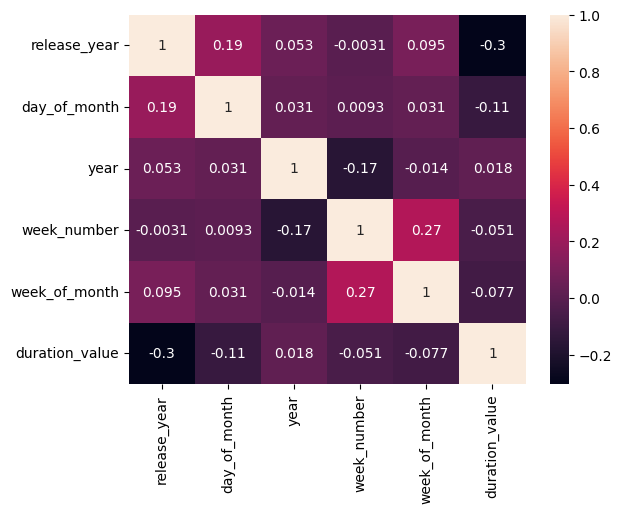

In [16]:
sns.heatmap(df[['release_year','day_of_month', 'year', 'week_number','week_of_month', 'duration_value']].corr(), annot = True)
plt.show()

Observations:
1. The numerical variables do not show much correlation.
2. The most correlated variables are release_year and duration_value with a correlation of -0.3.

Figure 2

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


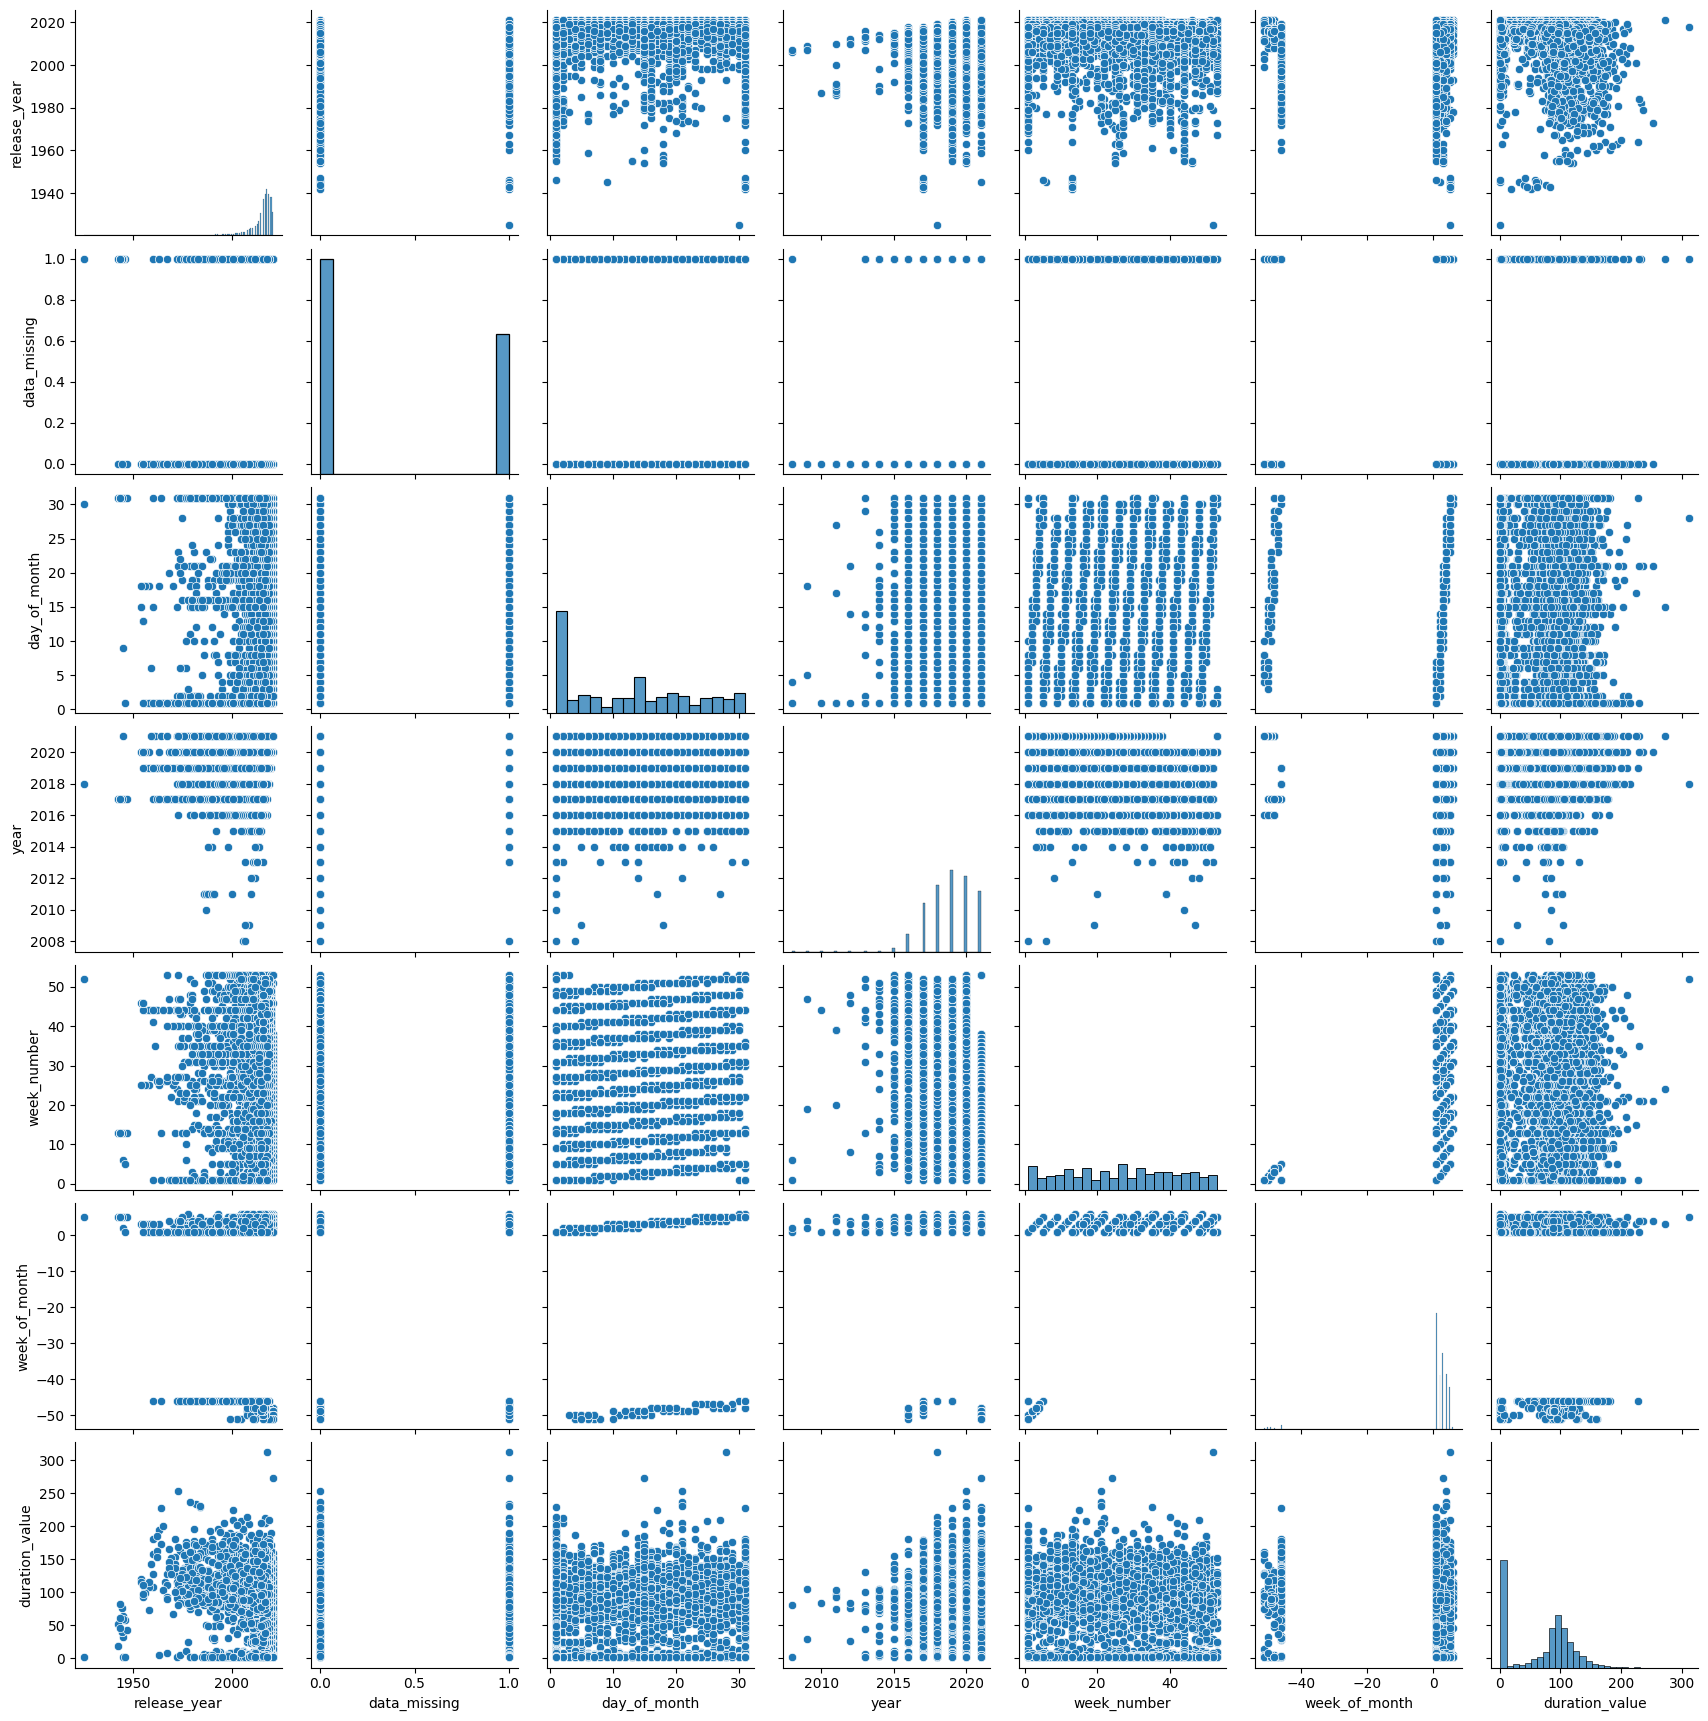

In [143]:
sns.pairplot(data = non_duplicate_df)
plt.show()

Observations:
1. Release_year and year against duration_value, day of the month against release year and year may show some relationship.

### Movie vs TV shows

Figure 3

<Axes: xlabel='type', ylabel='release_year'>

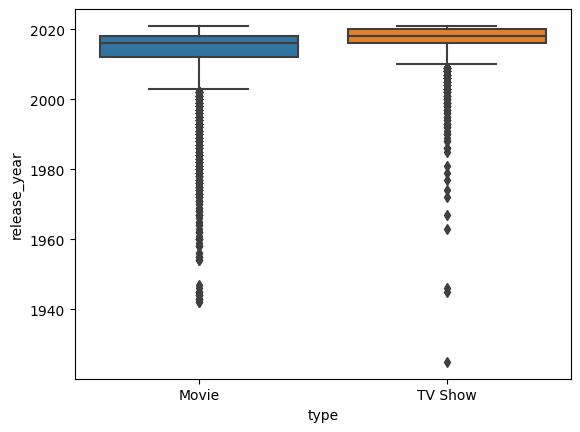

In [144]:
sns.boxplot(data = non_duplicate_df,
           x = 'type', y = 'release_year')

Observations:
1. We can notice that most of the TV Shows that were added to Netflix are released in the recent years than movies.
2. Also we can notice that there are some outlier TV Shows added to netflix that were released even before all the Movies were released.

Figure 4

<Figure size 2000x2000 with 0 Axes>

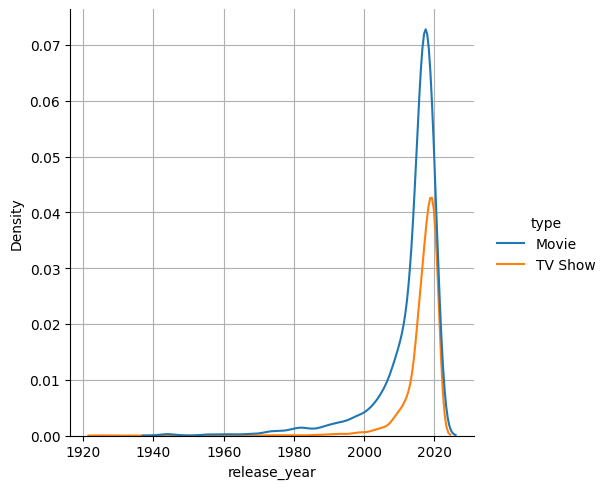

In [145]:
plt.figure(figsize = (20,20))
sns.displot(data = non_duplicate_df,
            x = 'release_year',
           hue = 'type', kind =  'kde')
plt.grid()
plt.show()

Observations:
1. We can observe that tv shows started releasing even before Movies 

Figure 5

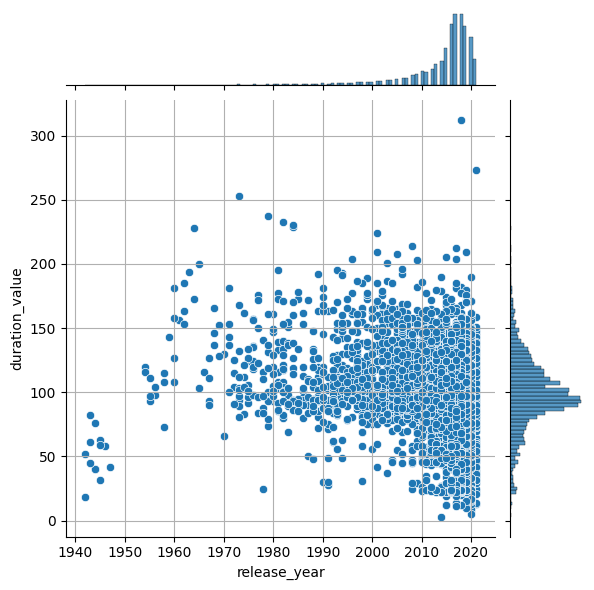

In [146]:
sns.jointplot(data =  non_duplicate_df[non_duplicate_df['type'] == 'Movie'],
             x = 'release_year',
             y = 'duration_value', kind = 'scatter')
plt.grid()
plt.show()

Observations:
1. We can see that in the recent years,  very small number of movies are exceeding the duration of 225 minutes compared to earlier years before 2005.

Figure 6

<Axes: xlabel='type', ylabel='year'>

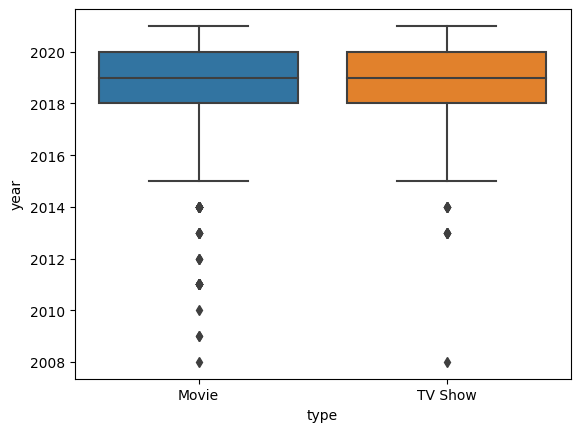

In [147]:
sns.boxplot(data = non_duplicate_df,
           x = 'type', y = 'year')

Observations:
1. No signifcant observations.

Figure 7

<Axes: xlabel='year', ylabel='Count'>

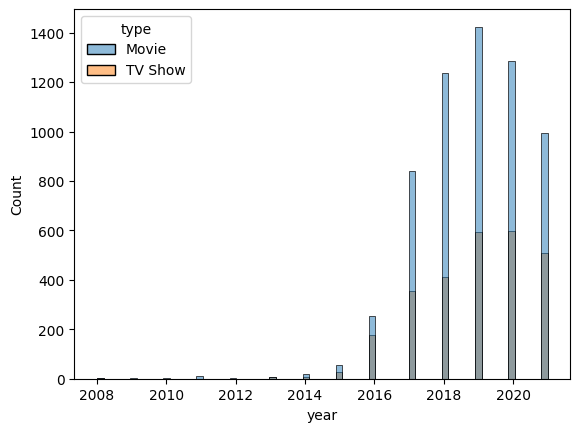

In [148]:
sns.histplot(data = non_duplicate_df,
            x = 'year',
            hue = 'type')

Obsevations:
1. There is an indication that the number of shows decreased in the recent years.

In [149]:
def day_month_year(x):
    x['day_month'] = str(x['day_of_month'])+"-"+x['month']
    x['month_year'] = x['month']+"-"+str(x['year'])
    return x

In [150]:
non_duplicate_df = non_duplicate_df.apply(day_month_year, axis = 1)

Figure 8

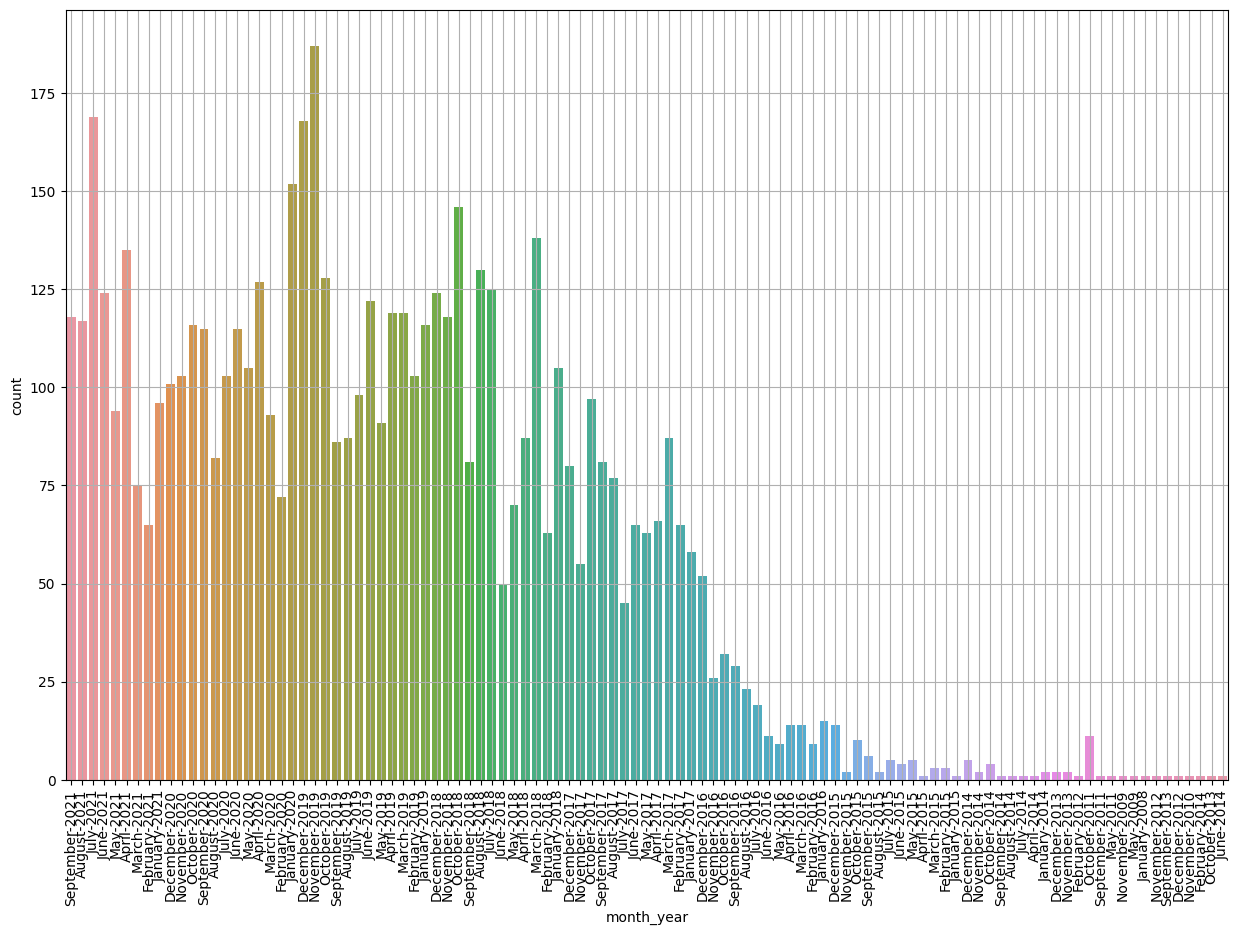

In [151]:
plt.figure(figsize = (15,10))
sns.countplot(data = non_duplicate_df[non_duplicate_df['type'] == 'Movie'],
             x = 'month_year')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Observations:
1. 2017 onwards, the number of movies being added to netflix have increased.
2. The most number of movies were added in November 2019, July 2021 and December 2019.

Figure 9

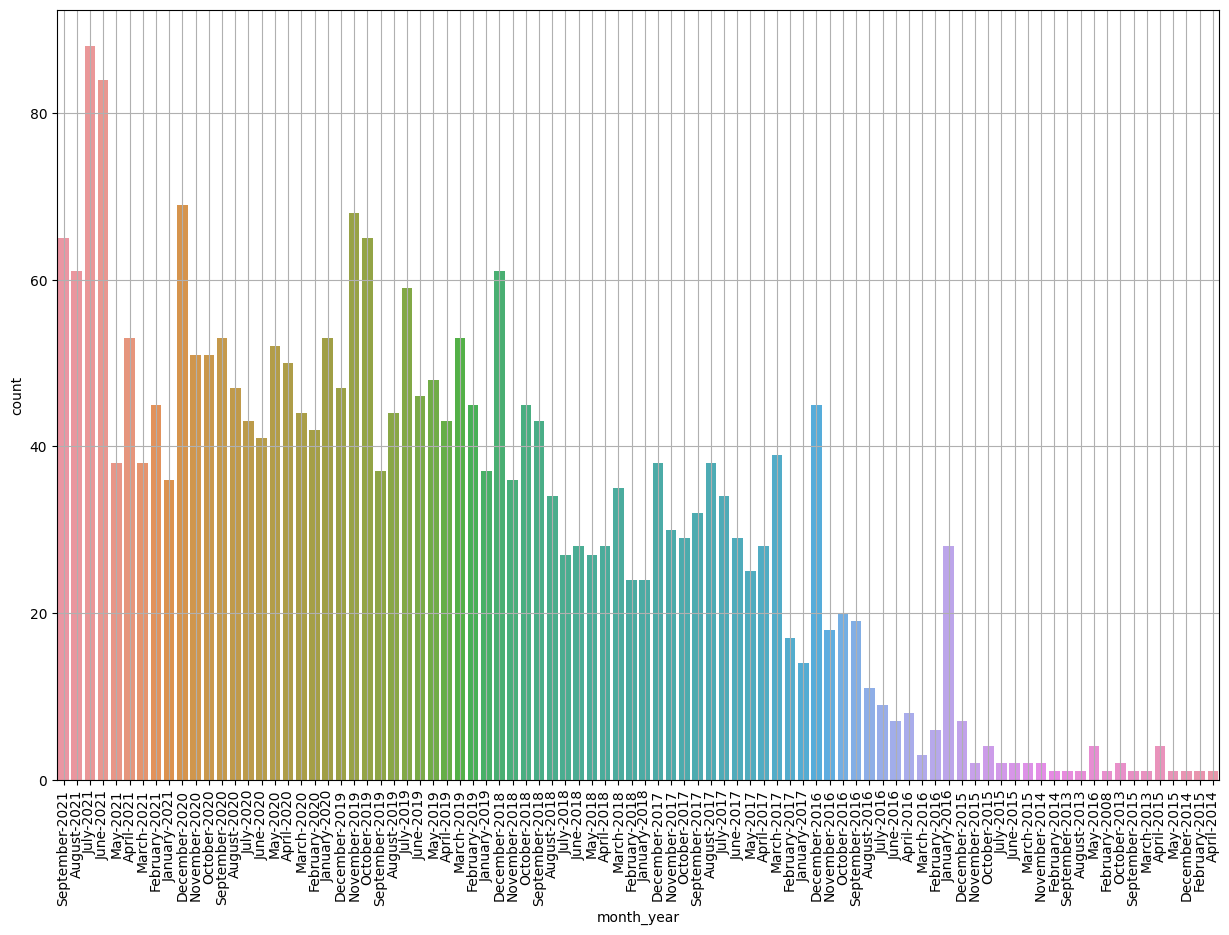

In [152]:
plt.figure(figsize = (15,10))
sns.countplot(data = non_duplicate_df[non_duplicate_df['type'] == 'TV Show'],
             x = 'month_year')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Observations:
1. Most number of TV shows are added in July 2021 and June 2021.

Figure 10

<Axes: xlabel='type', ylabel='day_of_month'>

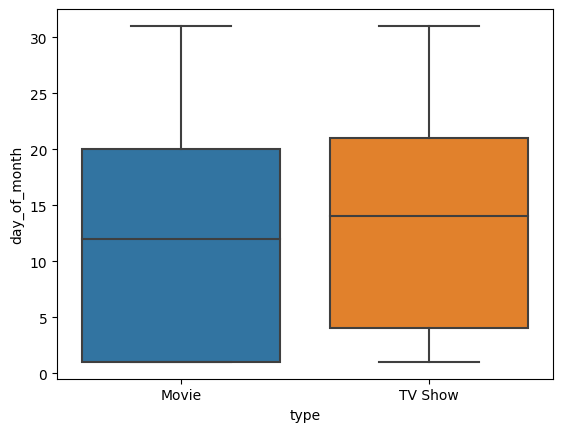

In [153]:
sns.boxplot(data = non_duplicate_df,
           x = 'type', y = 'day_of_month')

Observations:
1. The plot shows that it is prefered to add most of the movies and TV shows are added in the 1st half of the month.
2. The median day of the month on which the TV Shows are added is greater than the median day of the month on which movies are added.

Figure 11

<Axes: xlabel='day_of_month', ylabel='Count'>

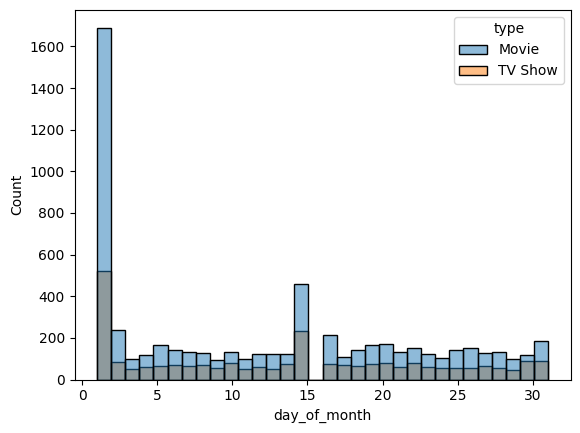

In [154]:
sns.histplot(data = non_duplicate_df,
            x = 'day_of_month',hue = 'type', bins=32)

Observations:
1. Consistently the number of movies added are always more than the number of tv shows added every day of the month.
2. Most number of movies and tv shows are added before the 15th day of the month.
3. Significantly more number of movies and considerably more number of tv shows are added in the 1st week of the month. 
4. The 2nd most day on which more number of movies and tv shows are addded on the 15th of the month.

Figure 12

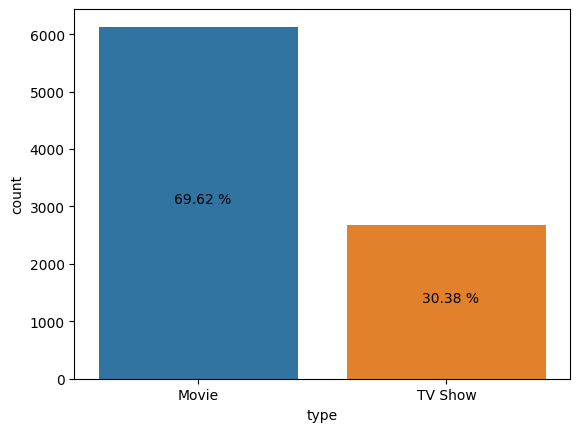

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [155]:
ax = sns.countplot(data = non_duplicate_df, x = 'type')
#ax.bar_label(ax.containers[0])
plt.text(-0.1,non_duplicate_df['type'].value_counts()[0]/2,str(round(non_duplicate_df['type'].value_counts(normalize = True)['Movie']*100,2))+" %")
plt.text(0.9,non_duplicate_df['type'].value_counts()[1]/2,str(round(non_duplicate_df['type'].value_counts(normalize = True)['TV Show']*100,2))+" %")
plt.show()
non_duplicate_df['type'].value_counts()

Observations:
1. About 6131 out of 8807 (i.e., 69.62%) show types is Movies. There are 2676 TV shows (i.e., 30.38%). This suggests that movies may be more successful.
2. We can observe that Movies are more popular than TV Shows.

### Analysing data for popular Directors

In [57]:
def build_countplot(df, col,order = None, counts = 100,hue=None,values = True, fig_size = (10,5),pvalue_index = -0.3,value_index = -0.3, pvalue_adjustment = 1, value_adjustment = 1,font_size = 9,rotate = 0,vfont_size = 9,vrotate = 0):
    plt.figure(figsize = fig_size)
    rating_indices = df[col].value_counts()[df[col].value_counts() > counts].index
    if order is None:
        order = rating_indices
    sns.countplot(data = df[df[col].isin(rating_indices)],
                 x = col,
                 order = order,
                 hue = hue)
    plt.xticks(rotation = 75)
    z1 = df[col].value_counts(normalize = True)[df[col].value_counts()>counts]
    z2 = df[col].value_counts()[df[col].value_counts()>counts]
    
    
    if values:
        index = 0
        for pvalue, value in zip(z1, z2):
            plt.text(index+pvalue_index, value/2+pvalue_adjustment, str(round(pvalue,3))+"%", fontsize = font_size, rotation = rotate)
            plt.text(index+value_index, value/3+value_adjustment, value,fontsize = vfont_size, rotation = vrotate)
            index += 1

    plt.show()
    if values: print(z2)

In [58]:
#In order to get director level unique rows
director = df.drop_duplicates(subset = ['show_id','director'], keep = 'first')
director.shape

(15527, 21)

Figure 13

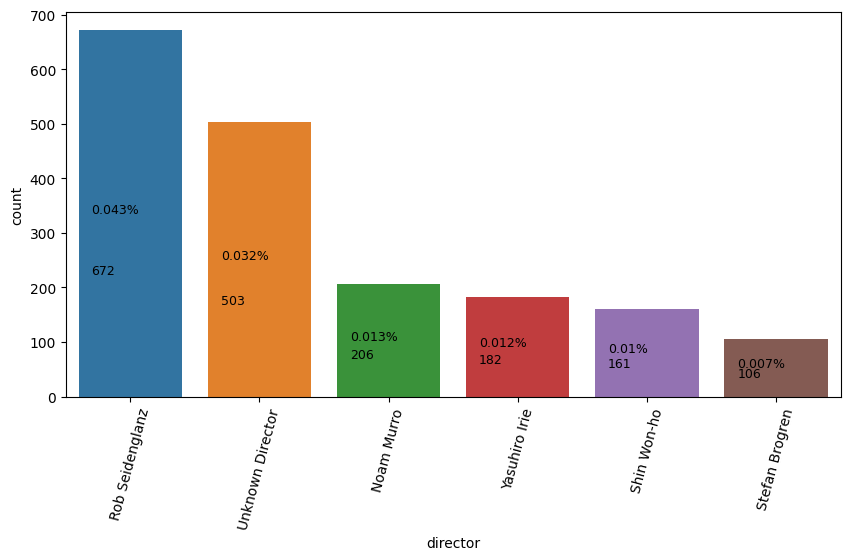

director
Rob Seidenglanz     672
Unknown Director    503
Noam Murro          206
Yasuhiro Irie       182
Shin Won-ho         161
Stefan Brogren      106
Name: count, dtype: int64


In [61]:
build_countplot(director, 'director', counts = 100)

Observations:
1. The top 5 most popular directors are Rob Seidenglanz followed by Unknown Directors(data missing), Noam Murro, Yasuhiro Irie, Shin Won-ho and Stefan Brogren.
2. Rob Seidenglanz has directed about 0.04% of the total Movies/TV Shows.

#### Directors of Movies vs TV Shows

In [62]:
director_movie = director[director['type'] == 'Movie']
director_tvshow = director[director['type'] == 'TV Show']

In [63]:
print(f"There are {director_movie['director'].nunique()} unique Movie directors and {director_tvshow['director'].nunique()} unique TV Show directors in the data.")

There are 4785 unique Movie directors and 1972 unique TV Show directors in the data.


#### Most popular Movie directors

Figure 14

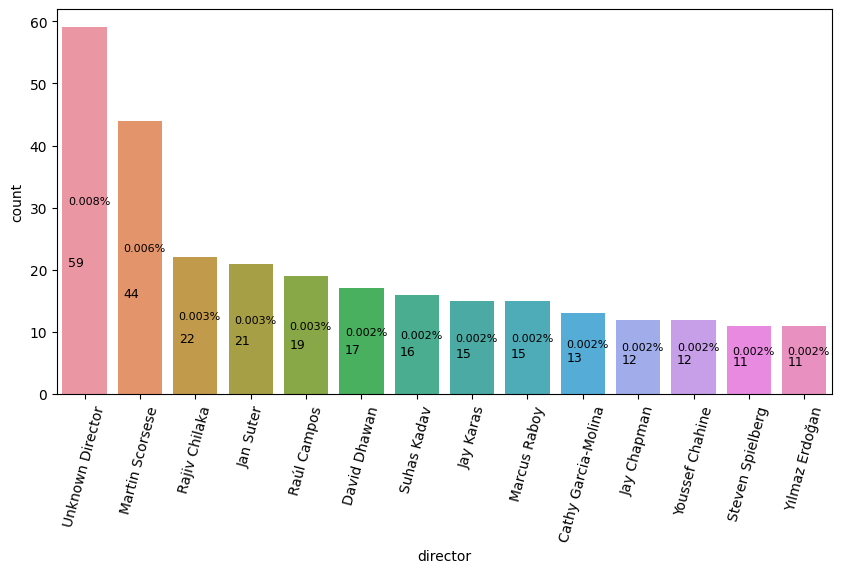

director
Unknown Director       59
Martin Scorsese        44
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
David Dhawan           17
Suhas Kadav            16
Jay Karas              15
Marcus Raboy           15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Steven Spielberg       11
Yılmaz Erdoğan         11
Name: count, dtype: int64


In [161]:
build_countplot(director_movie, 'director', counts = 10, font_size = 8)

Observations:
1. We dont know the director for atleast 59 movies in the data.
2. Martin Scorsese is the most popular director in the Movie segment.
3. Top 10 most popular directors in the movie segment are Martin Scorsese, Rajiv Chilaka, Jan Suter, Raúl Campos, David Dhawan, Suhas Kadav, Jay Karas, Marcus Raboy, Cathy Champman and Youssef Chahine.

#### Most popular TV Show directors

Figure 15

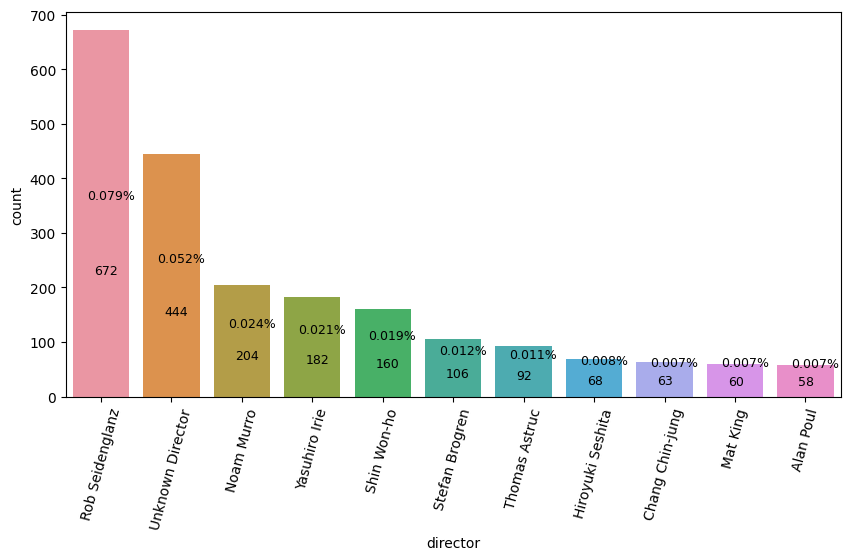

director
Rob Seidenglanz     672
Unknown Director    444
Noam Murro          204
Yasuhiro Irie       182
Shin Won-ho         160
Stefan Brogren      106
Thomas Astruc        92
Hiroyuki Seshita     68
Chang Chin-jung      63
Mat King             60
Alan Poul            58
Name: count, dtype: int64


In [67]:
build_countplot(director_tvshow, 'director',counts = 55, pvalue_index = -0.2, value_index = -0.1, pvalue_adjustment = 25)

Observations:

1. We dont know the director for atleast 444 TV shows in the data.
2. Top 10 most popular TV Show directors in the data are Rob Seidenglanz, Noam Murro, Yasuhiro Irie,Shin Won-ho, Stefan Brogren, Thomas Astruc, Hiroyuki Seshita, Chang Chin-jung, Mat King and Alan Poul.

### Analysing for popular Actors

In [163]:
casts = df.drop_duplicates(subset = ['show_id','cast'], keep = 'first')
casts.shape

(65580, 21)

#### Analysing the overall casts

Figure 16

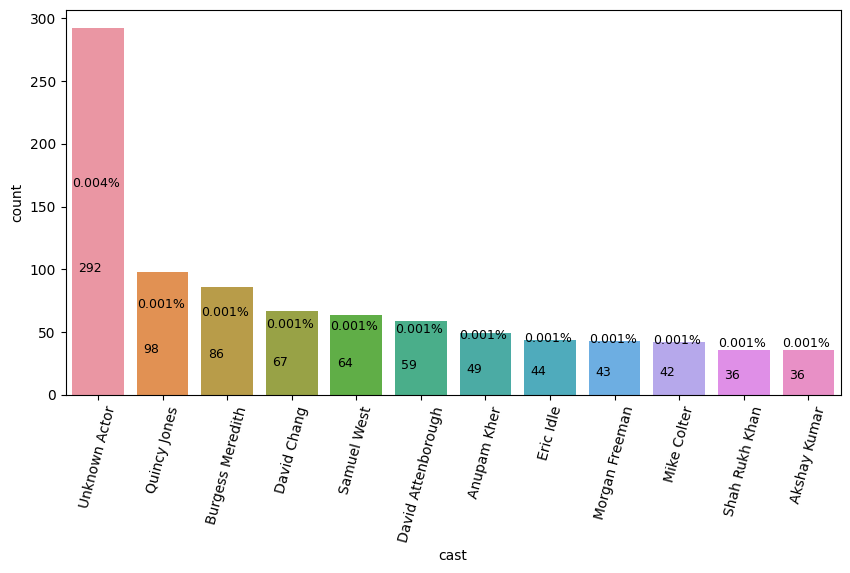

cast
Unknown Actor         292
Quincy Jones           98
Burgess Meredith       86
David Chang            67
Samuel West            64
David Attenborough     59
Anupam Kher            49
Eric Idle              44
Morgan Freeman         43
Mike Colter            42
Shah Rukh Khan         36
Akshay Kumar           36
Name: count, dtype: int64


In [164]:
build_countplot(casts, 'cast', counts = 35, pvalue_index = -0.4, value_index = -0.3, pvalue_adjustment = 20)

Observations:
1. Most of the actors' name is not available (unknown).
2. THe top 5 casts that are most popular are, Quincy Jones, Burgess Meredith, David Chang, Samuel West and David Attenborough.

In [165]:
movie_casts = casts[casts['type'] == 'Movie']
tv_casts = casts[casts['type'] == 'TV Show']

#### Analysing popular movie casts

Figure 17

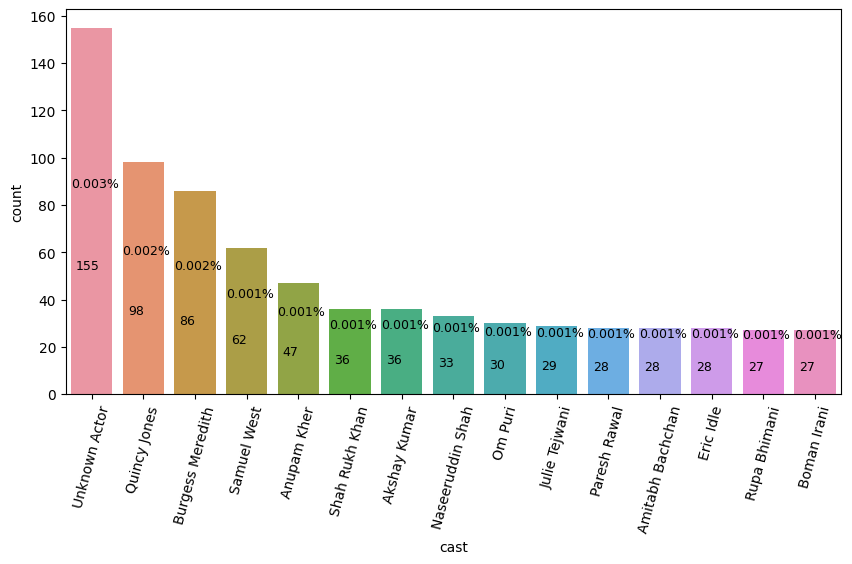

cast
Unknown Actor       155
Quincy Jones         98
Burgess Meredith     86
Samuel West          62
Anupam Kher          47
Shah Rukh Khan       36
Akshay Kumar         36
Naseeruddin Shah     33
Om Puri              30
Julie Tejwani        29
Paresh Rawal         28
Amitabh Bachchan     28
Eric Idle            28
Rupa Bhimani         27
Boman Irani          27
Name: count, dtype: int64


In [166]:
build_countplot(movie_casts, 'cast', counts = 25, pvalue_index = -0.4, value_index = -0.3, pvalue_adjustment = 10)

Observations:
1. We do not have details of the unknown actors.
2. The top 10 most popular Movie casts are Quincy Jones,Burgess Meredith, Samuel West, Anupam Kher, Shah Rukh Khan, Akshay Kumar,Naseeruddin Shah,Om Puri, Julie Tejwani, Paresh Rawal and Amitabh Bachachan.

#### Analysing most popular tv actors

Figure 18

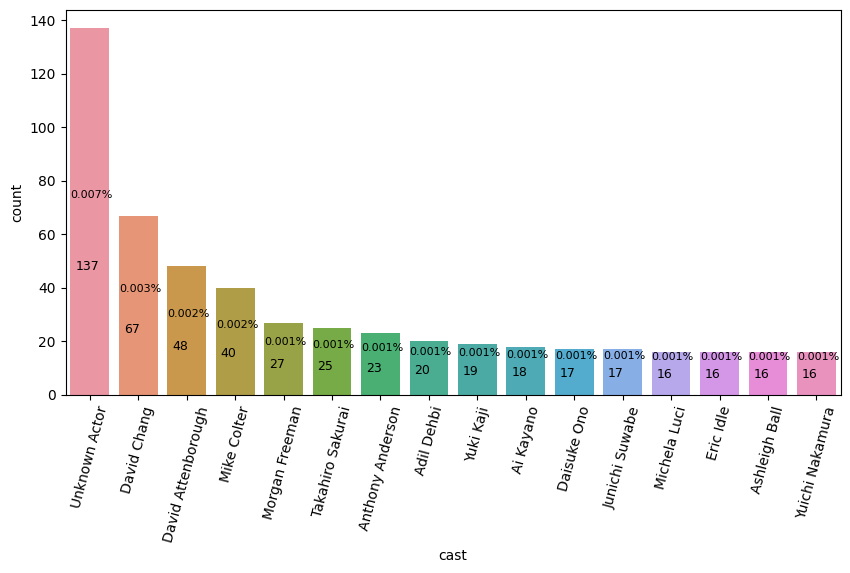

cast
Unknown Actor         137
David Chang            67
David Attenborough     48
Mike Colter            40
Morgan Freeman         27
Takahiro Sakurai       25
Anthony Anderson       23
Adil Dehbi             20
Yuki Kaji              19
Ai Kayano              18
Daisuke Ono            17
Junichi Suwabe         17
Michela Luci           16
Eric Idle              16
Ashleigh Ball          16
Yuichi Nakamura        16
Name: count, dtype: int64


In [186]:
build_countplot(tv_casts, 'cast', counts = 15, pvalue_index = -0.4, value_index = -0.3, pvalue_adjustment = 5, font_size = 8)

Observations:
1. The top 10 most popular tv actors are David Chang,David Attenborough,Mike Colter,Morgan Freeman, Takahiro Sakurai, Anthony Anderson, Adil Dehbi, Yuki Kaji, Ai Kayano and Daisuke Ono.

### Analysing countries

In [187]:
country_df = df.drop_duplicates(subset = ['show_id', 'country'])
country_df.shape

(11053, 21)

In [188]:
round(country_df['show_id'].value_counts()[country_df['show_id'].value_counts() > 1].size/df.drop_duplicates(subset = ['show_id']).shape[0],4)*100

16.45

Observations:
1. More than 16.45 % of the movies/TV Shows are added to more than 1 country in the Netflix platform.

Figure 19

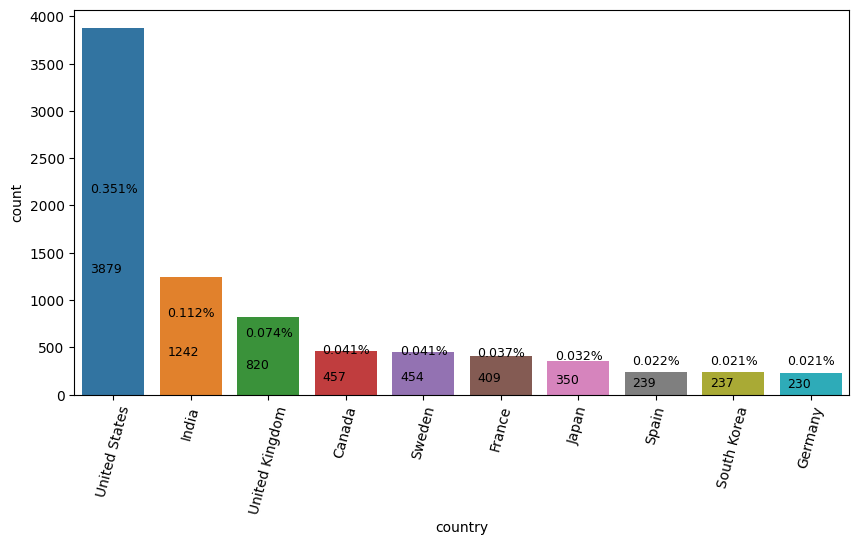

country
United States     3879
India             1242
United Kingdom     820
Canada             457
Sweden             454
France             409
Japan              350
Spain              239
South Korea        237
Germany            230
Name: count, dtype: int64


In [189]:
build_countplot(country_df, 'country', counts = 200, pvalue_index = -0.3, value_index = -0.3, pvalue_adjustment = 200)

Observations:
1. Most popular countries to release the movies / tv shows are the United States, India, United Kingdom, Canada and Sweden.

Figure 20

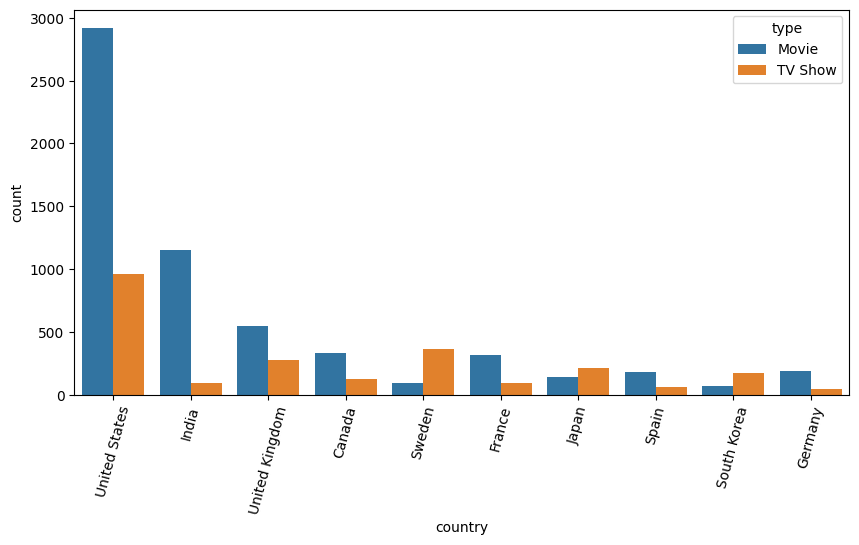

In [190]:
plt.figure(figsize = (10,5))
counts = 200
country_indices = country_df['country'].value_counts()[country_df['country'].value_counts() > counts].index
sns.countplot(data = country_df[country_df['country'].isin(country_indices)],
             x = 'country',
             order = country_indices,
             hue = 'type')
plt.xticks(rotation = 75)
plt.show()

Observations:
1. Among the popular countries, United States and India are producing significantly more Movies than TV Shows that goes on Netflix.
2. United Kingdom, Canada, France, Spain and Germany produce more movies that tv shows.
3. Whereas, Sweden, Japan and South Korea produce more TV Shows than movies.

In [191]:
movie_country = country_df[country_df['type'] == 'Movie']
tvshow_country = country_df[country_df['type'] == 'TV Show']

In [192]:
movie_country.shape, tvshow_country.shape

((7986, 21), (3067, 21))

#### Analysing movies with respect to countries

Figure 21

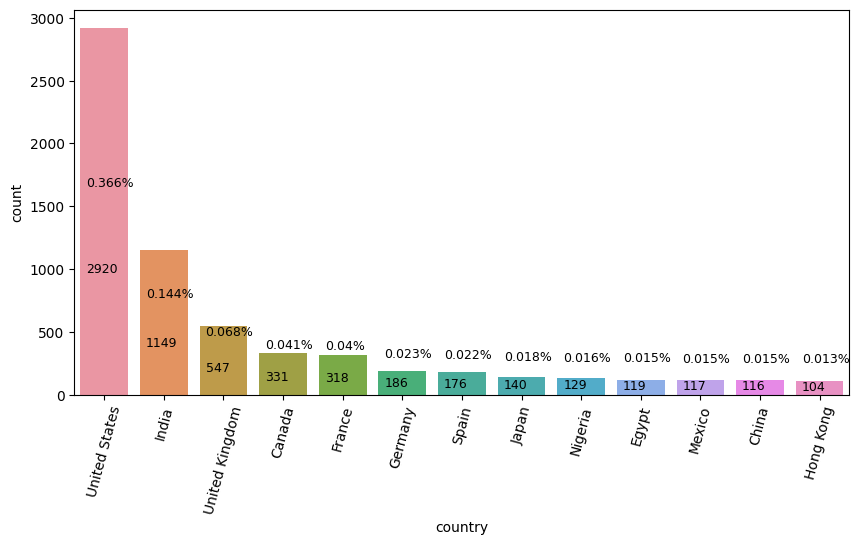

country
United States     2920
India             1149
United Kingdom     547
Canada             331
France             318
Germany            186
Spain              176
Japan              140
Nigeria            129
Egypt              119
Mexico             117
China              116
Hong Kong          104
Name: count, dtype: int64


In [194]:
build_countplot(movie_country, 'country', counts = 100, pvalue_index = -0.3, value_index = -0.3, pvalue_adjustment = 200)

Observations:
1. Top 10 most popular countries that add the most movies are 'United States', 'India', 'United Kingdom', 'Canada', 'France',Germany, Spain, Japan, Nigeria and Egypt.

Figure 22

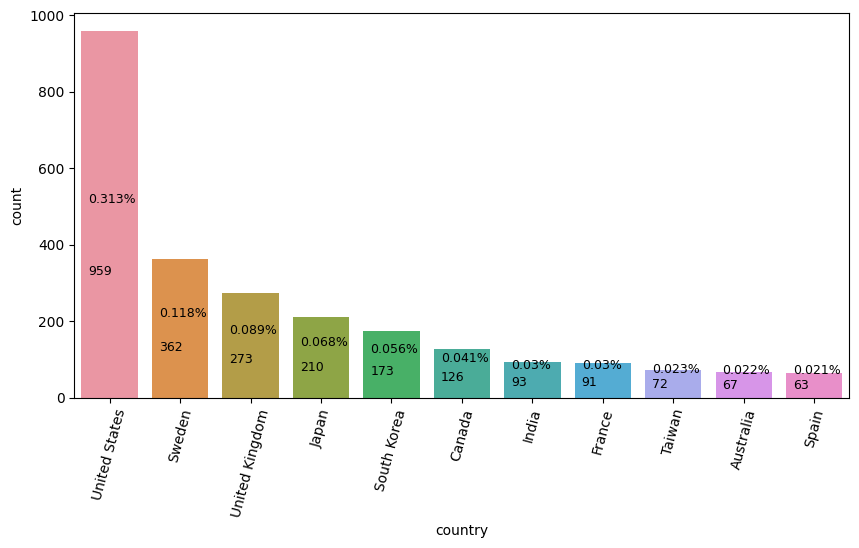

country
United States     959
Sweden            362
United Kingdom    273
Japan             210
South Korea       173
Canada            126
India              93
France             91
Taiwan             72
Australia          67
Spain              63
Name: count, dtype: int64


In [196]:
build_countplot(tvshow_country, 'country', counts = 60, pvalue_index = -0.3, value_index = -0.3, pvalue_adjustment = 30)

Observations:

Top 10 most popular countries that add the most tv shows are 'United States', 'Sweden', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'India', 'France', 'Taiwan' and 'Australia.

### Duration Range analysis

In [197]:
movie_country.groupby(['duration_value'])['show_id'].count().sort_values(ascending = False)[:10]

duration_value
90     206
93     205
94     193
96     189
97     187
91     178
95     177
103    171
92     171
102    164
Name: show_id, dtype: int64

Observations:
1. The most popular duration for movies is between 90 to 103 minutes.

In [198]:
tvshow_country.groupby(['duration_value'])['show_id'].count().sort_values(ascending = False)

duration_value
1     2021
2      497
3      242
4      119
5       75
6       35
7       28
8       18
10      11
9        9
12       3
13       3
15       3
11       2
17       1
Name: show_id, dtype: int64

Observations:
1. The most popular TV shows are the shows with just 1 season.
2. TV shows that have 2 to 4 seasons are also top popular nnumber of seasons.

### Most popular Rating

In [199]:
rating_df = df.drop_duplicates(subset= ['show_id','rating'])

In [200]:
rating_df.shape

(8808, 21)

Figure 23

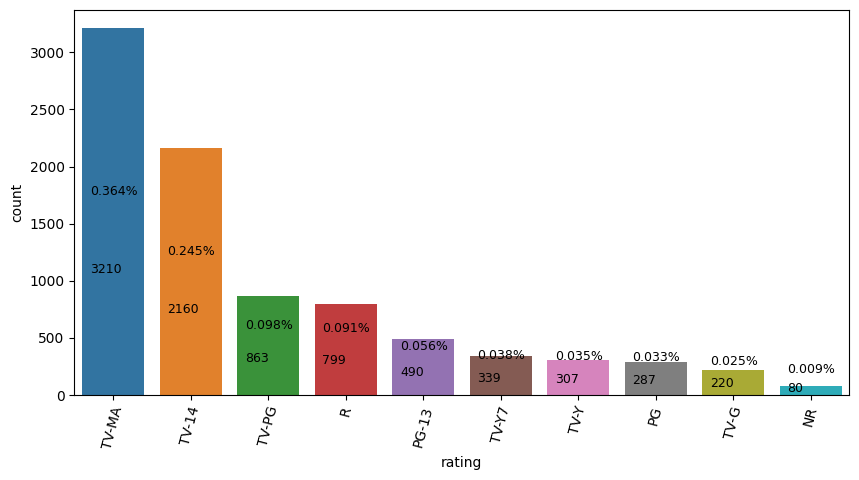

rating
TV-MA    3210
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     339
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


In [203]:
build_countplot(rating_df, 'rating', counts = 50, pvalue_index = -0.3, value_index = -0.3, pvalue_adjustment = 150)

Observations:
1. Overall the top ratings for movies and tv shows are TV-MA and TV-14 by in large and followed by TV-PG, R and PG-13.

Figure 24

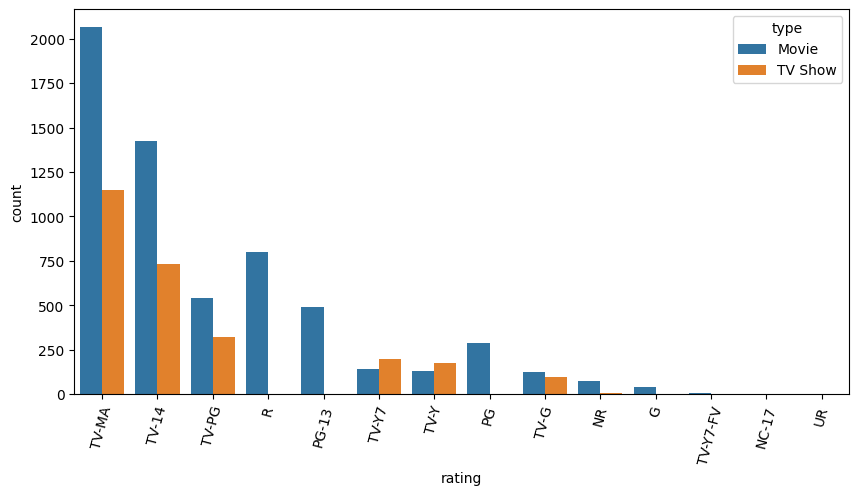

In [204]:
build_countplot(rating_df, 'rating',hue = 'type',values = False, counts = 0, pvalue_index = -0.3, value_index = -0.3, pvalue_adjustment = 150)

Observations:
1. Some of the ratings like R, PG-13, G etc seem to be used very less or none for TV shows.

In [205]:
movie_rating = rating_df[rating_df['type'] == 'Movie']
tvshow_rating = rating_df[rating_df['type'] == 'TV Show']

In [206]:
movie_rating.shape, tvshow_rating.shape

((6131, 21), (2677, 21))

#### Analysing movie ratings

Figure 25

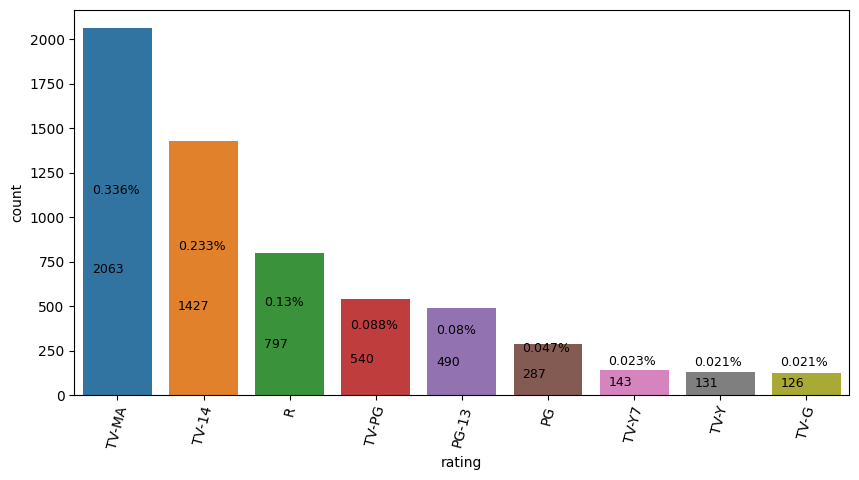

rating
TV-MA    2063
TV-14    1427
R         797
TV-PG     540
PG-13     490
PG        287
TV-Y7     143
TV-Y      131
TV-G      126
Name: count, dtype: int64


In [207]:
build_countplot(movie_rating, 'rating', counts = 100, pvalue_index = -0.3, value_index = -0.3, pvalue_adjustment = 100)

Observations:
1. The top 5 popular movie ratings are TV-MA, TV-14, R, TV-PG and PG-13.

Figure 26

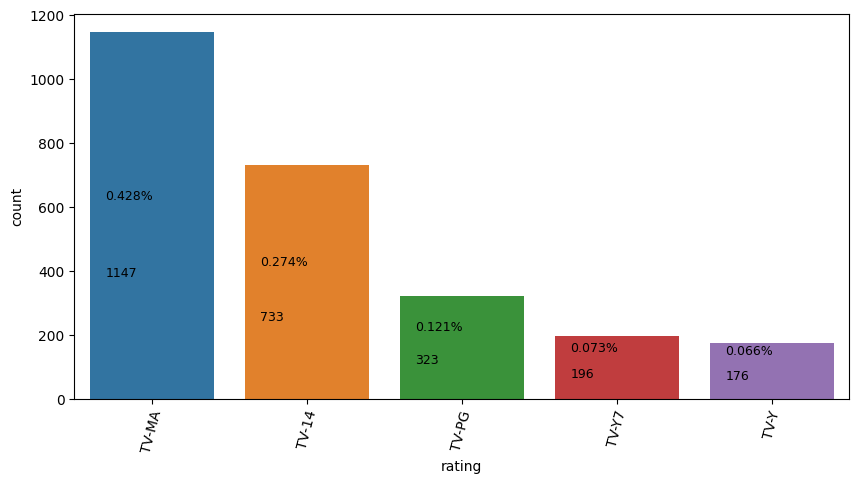

rating
TV-MA    1147
TV-14     733
TV-PG     323
TV-Y7     196
TV-Y      176
Name: count, dtype: int64


In [208]:
build_countplot(tvshow_rating, 'rating', counts = 100, pvalue_index = -0.3, value_index = -0.3, pvalue_adjustment = 50)

Observations:
1. The top 5 most popular tvshow ratings are TV-MA, TV-14, TV-PG, TV-Y7 and TV-Y.

### Most Popular Genre/listed_in

In [4]:
listing_df = df.drop_duplicates(subset= ['show_id','listed_in'])
listing_df.shape

(19323, 21)

Figure 27

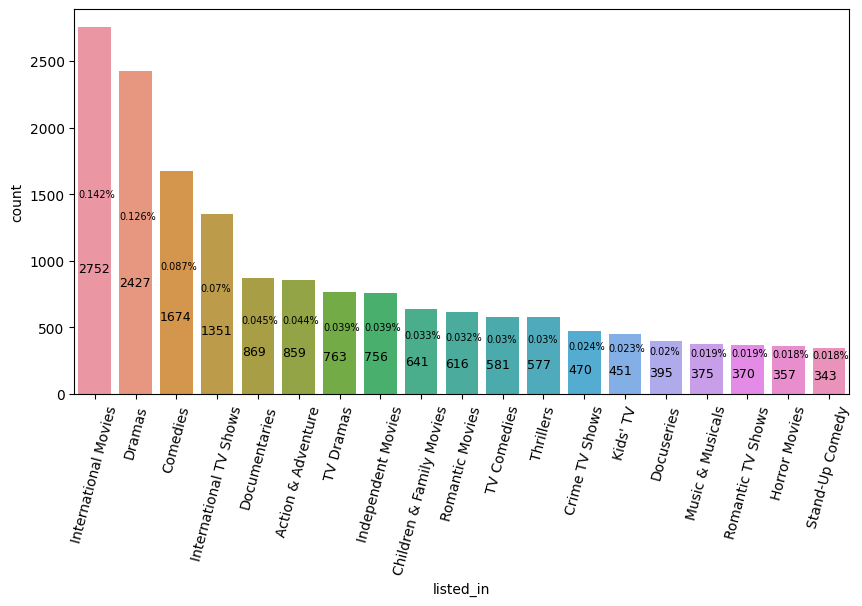

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Name: count, dtype: int64


In [211]:
build_countplot(listing_df, 'listed_in', counts = 300, pvalue_index = -0.4, value_index = -0.4, pvalue_adjustment = 100,font_size = 7)

Observations:
1. Overall, the top 5 listings for movies and tv shows are International Movies, Dramas, Comedies, International TV Shows and Documentaries.

In [3]:
movie_wordcloud = WordCloud(background_color="white").generate(' '.join(df['listed_in'][df['type'] == 'Movie'].tolist()))
tvshow_wordcloud = WordCloud(background_color="white").generate(' '.join(df['listed_in'][df['type'] == 'TV Show'].tolist()))

Figure 28

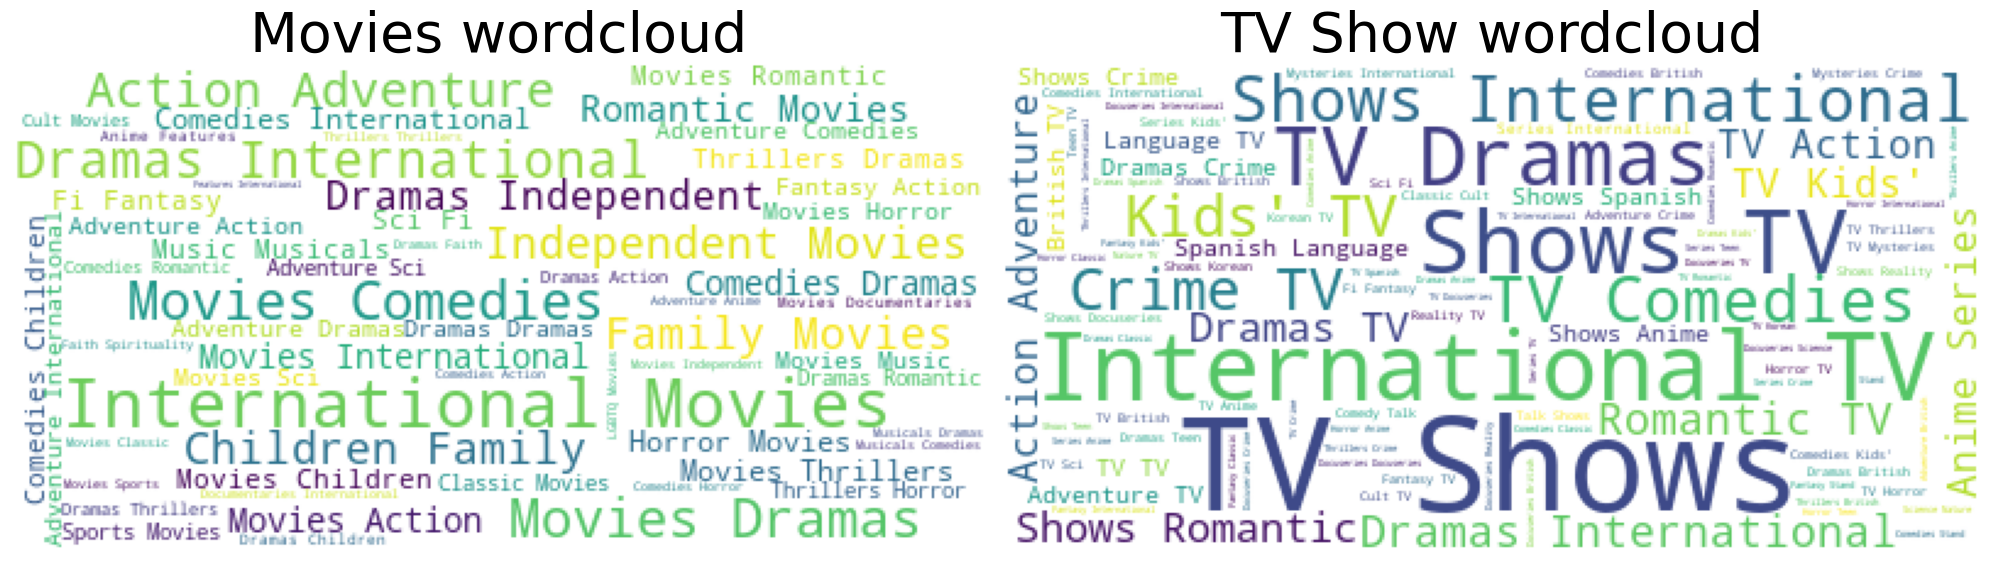

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Movies wordcloud",fontsize = 40)
plt.imshow(movie_wordcloud)
plt.axis('off')
plt.subplot(1,2,2)
plt.title("TV Show wordcloud",fontsize = 40)
plt.imshow(tvshow_wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
movie_listing = listing_df[listing_df['type'] == 'Movie']
tvshow_listing = listing_df[listing_df['type'] == 'TV Show']

In [6]:
movie_listing.shape, tvshow_listing.shape

((13190, 21), (6133, 21))

Figure 29

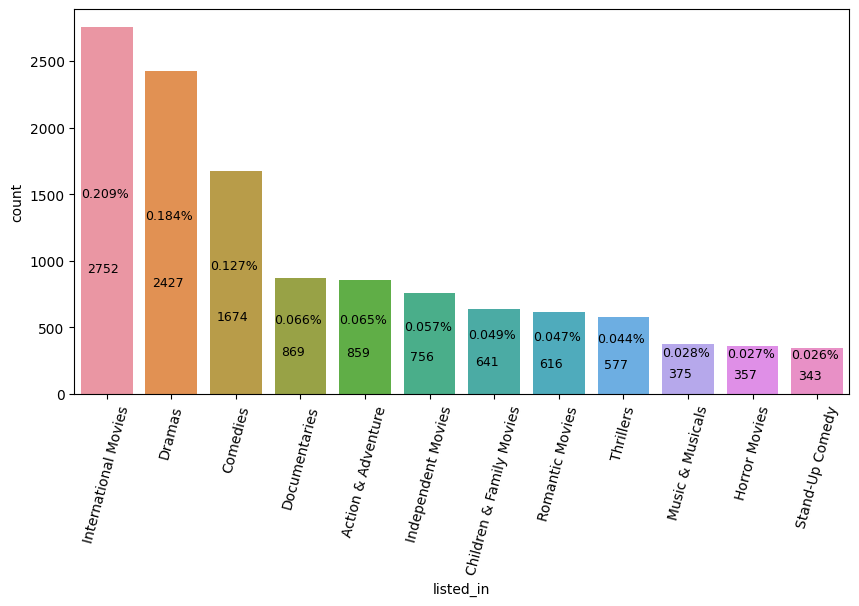

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Name: count, dtype: int64


In [8]:
build_countplot(movie_listing, 'listed_in', counts = 300, pvalue_index = -0.4, value_index = -0.3, pvalue_adjustment = 100)

Observations:
1. The top 10 listings for movies are International Movies, Dramas, Comedies, Documentaries, Action & Adventure, Independent Movies, Children & Family Movies, Romantic Movies, Thrillers and Music & Musicals.

Figure 30

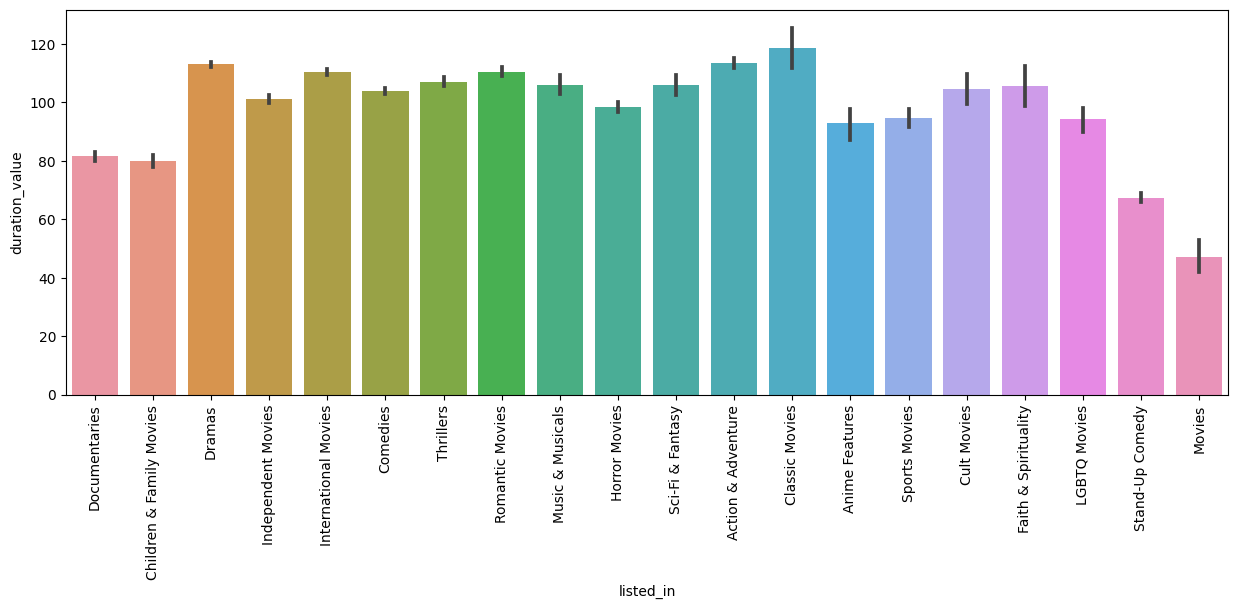

In [215]:
plt.figure(figsize = (15,5))
sns.barplot(data = movie_listing,
            y = 'duration_value',
            x = 'listed_in')
plt.xticks(rotation = 90)
plt.show()

Observations:
1. The popular movie listings that we found above like International Movies, Dramas, Comedies and Action & Adventure all have average durations between 105 and 115 minutes. Documentaries on average are 80 mins long..
2. Classic movies have the highest average duration of 120 mins and the least duration is for movies listed under 'Movies' with duration close to 50 minutes.

Figure 31

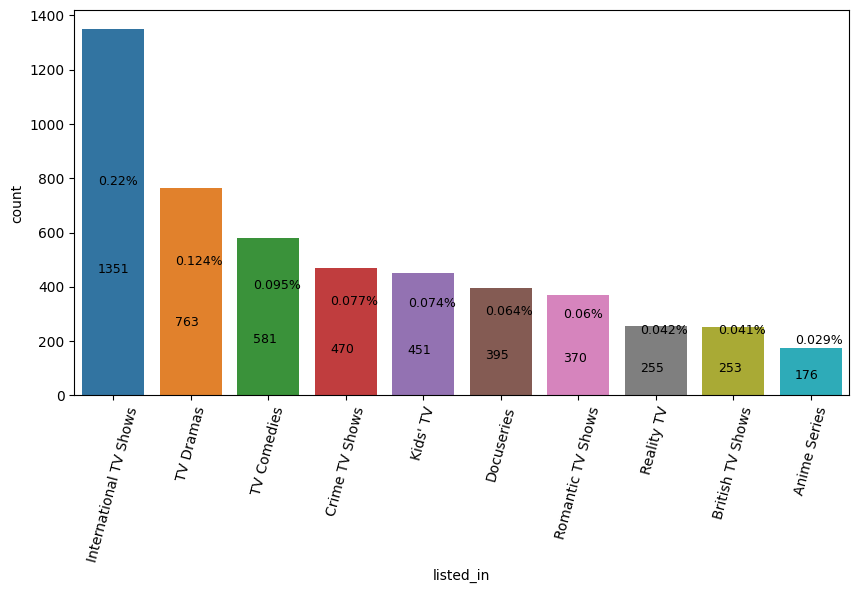

listed_in
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               176
Name: count, dtype: int64


In [10]:
build_countplot(tvshow_listing, 'listed_in', counts = 175, pvalue_index = -0.2, value_index = -0.2, pvalue_adjustment = 100)

Observations:
1. The top 10 listings for TV Shows are International TV Shows, TV Dramas, TV Comedies, Crime TV Shows, Kids' TV, Docuseries, Romantic TV Shows,Reality TV, British TV Shows and Anime Series.

Figure 32

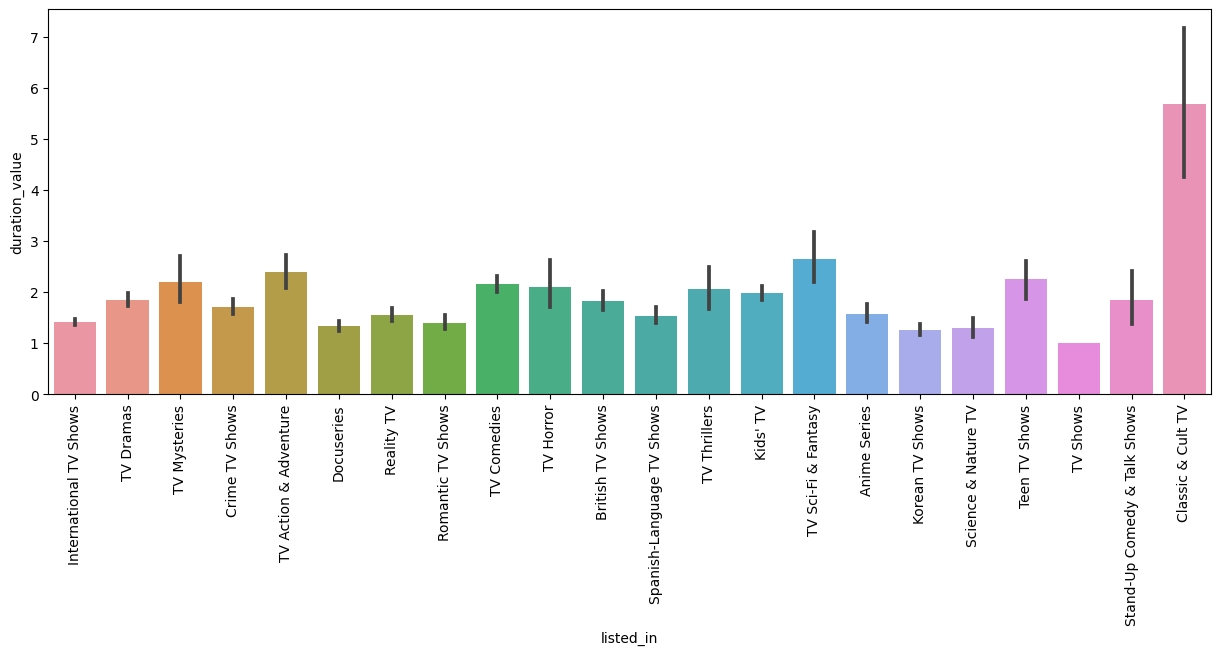

In [217]:
plt.figure(figsize = (15,5))
sns.barplot(data = tvshow_listing,
            y = 'duration_value',
            x = 'listed_in')
plt.xticks(rotation = 90)
plt.show()

Observations:
1. The most popular TV show listings that we got from above like International TV Shows, TV Dramas, TV Comedies, Crime TV Shows and Kids' TV have 1 to 3 seasons on average.
2. TV shows listed under "Classic & Cult TV' have the highest average number of seasons.

Figure 33

<Axes: xlabel='type', ylabel='year'>

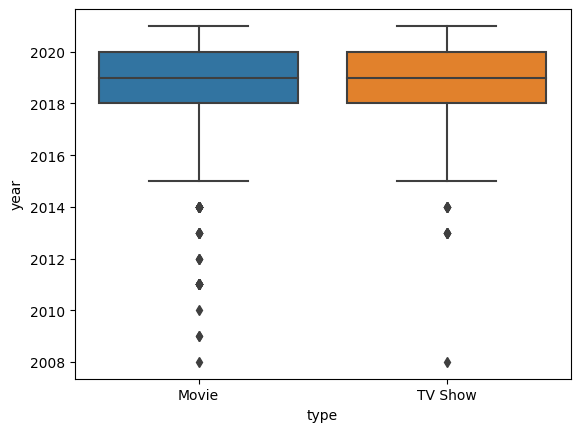

In [218]:
sns.boxplot(data = non_duplicate_df,
            y = 'year',
           x = 'type')

### Most popular month

In [219]:
month_df = df.drop_duplicates(subset =['show_id', 'month'])
month_df.shape

(8816, 21)

Figure 34

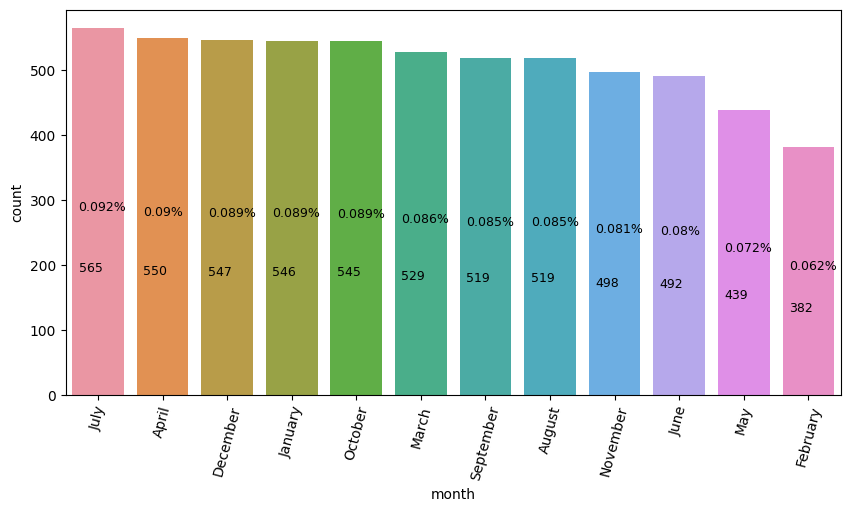

month
July         565
April        550
December     547
January      546
October      545
March        529
September    519
August       519
November     498
June         492
May          439
February     382
Name: count, dtype: int64


In [220]:
build_countplot(month_df[month_df['type'] == 'Movie'],  'month',counts = 0, font_size = 9)

Observations:
1. Top 5 most popular months in which the most number of movies were added are July, April, December, January and October.

In [221]:
months = ['January','February','March', 'April','May', 'June', 'July', 'August','September', 'October', 'November', 'December']

Figure 35

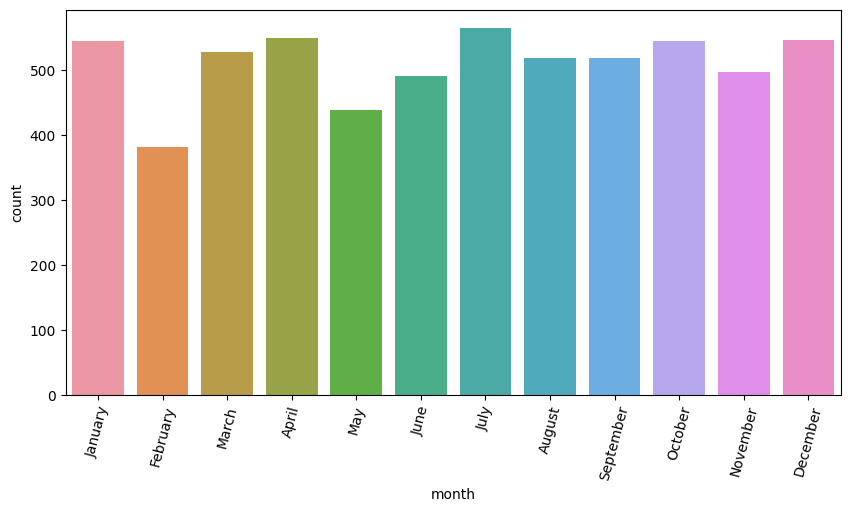

In [222]:
build_countplot(month_df[month_df['type'] == 'Movie'],  'month',values = False, order = months, counts = 0, font_size = 9)

Observations:
1. The above graph shows some kind of a cycle in the increase of number of movies added with respect to the months. Peaks in Jan, Apr, Jul, Oct and Dec.

Figure 36

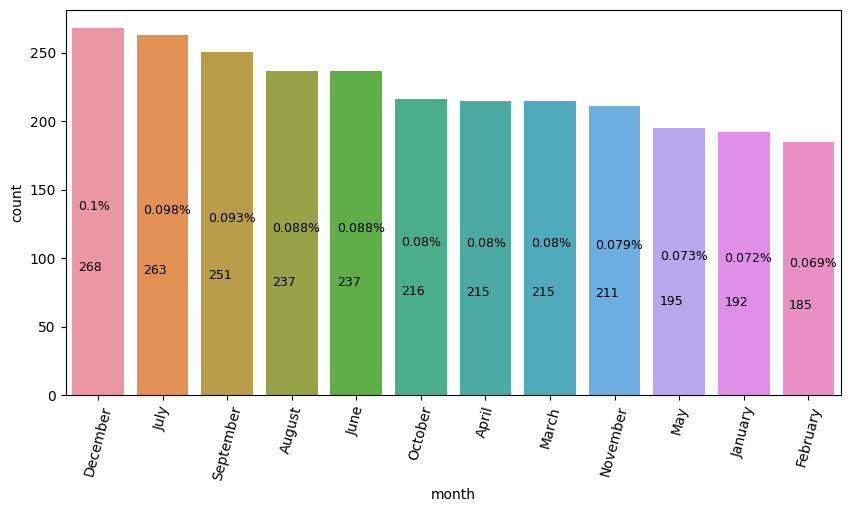

month
December     268
July         263
September    251
August       237
June         237
October      216
April        215
March        215
November     211
May          195
January      192
February     185
Name: count, dtype: int64


In [223]:
build_countplot(month_df[month_df['type'] == 'TV Show'],  'month',counts = 0, font_size = 9)

Observations:
1. Top 5 months in which most number of tv shows were added are December, July, September, August and June.

Figure 37

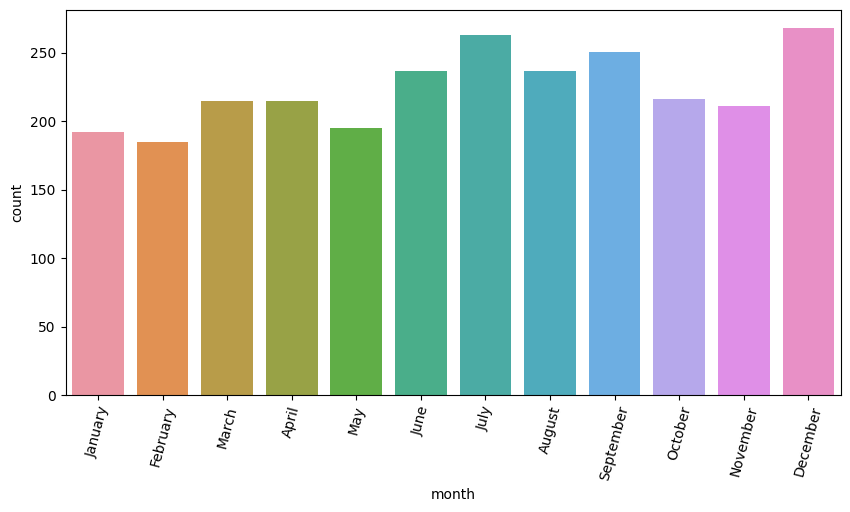

In [224]:
build_countplot(month_df[month_df['type'] == 'TV Show'],  'month',values = False, order = months, counts = 0, font_size = 9)

Observations:
1. unlike the movies, for TV shows, the peaks of number of tv shows added is in the later half of the year.

### Most popular day

In [225]:
day_df = df.drop_duplicates(subset =['show_id', 'day'])
day_df.shape

(8815, 21)

Figure 38

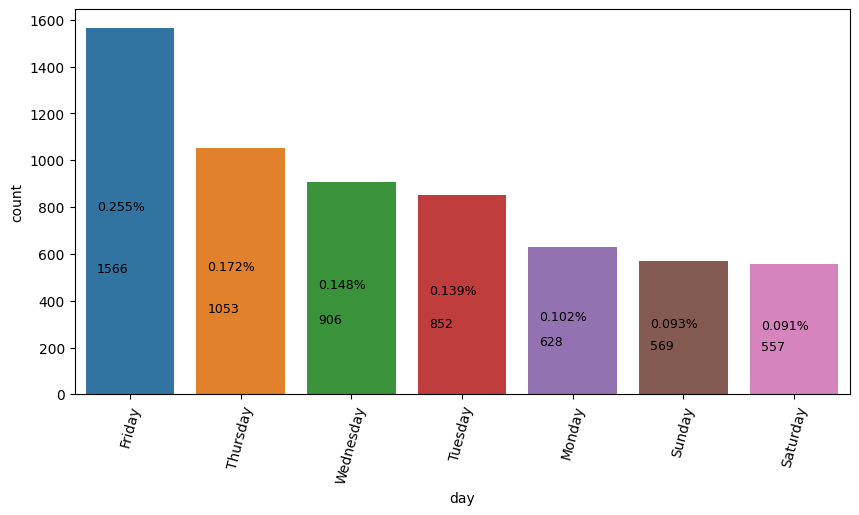

day
Friday       1566
Thursday     1053
Wednesday     906
Tuesday       852
Monday        628
Sunday        569
Saturday      557
Name: count, dtype: int64


In [226]:
build_countplot(day_df[day_df['type'] == 'Movie'],'day',counts = 0, font_size = 9)

Observations:
1. Most popular day of the week to add new movies is Friday and Thursday.
2. Least popular day of the week to add new movie is Saturday and Sunday.

Figure 39

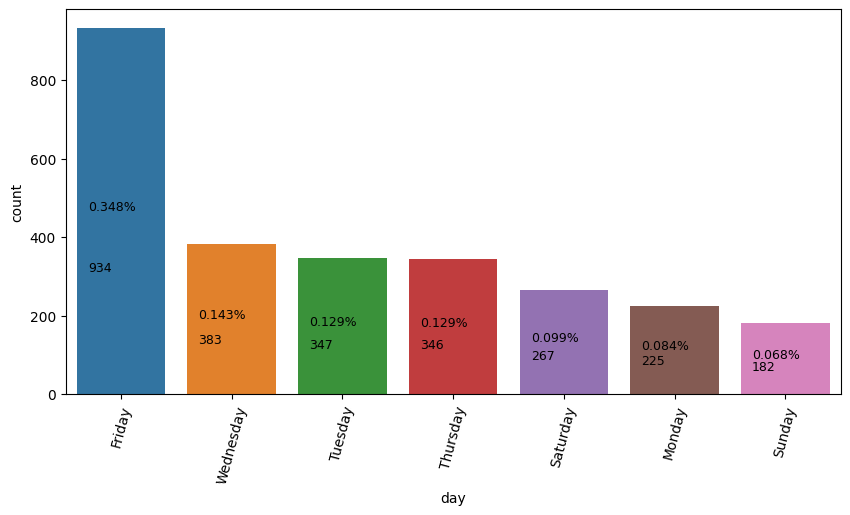

day
Friday       934
Wednesday    383
Tuesday      347
Thursday     346
Saturday     267
Monday       225
Sunday       182
Name: count, dtype: int64


In [227]:
build_countplot(day_df[day_df['type'] == 'TV Show'],'day',counts = 0, font_size = 9)

Observations:
1. By a significantly large margin, the most popular day of the week to add a new TV Show is Friday and the least popular day to add a new TV Show is Saturday.

### most popular day of month

In [228]:
dom_df = df.drop_duplicates(subset =['show_id', 'day_of_month'])
dom_df.shape

(8815, 21)

Figure 40

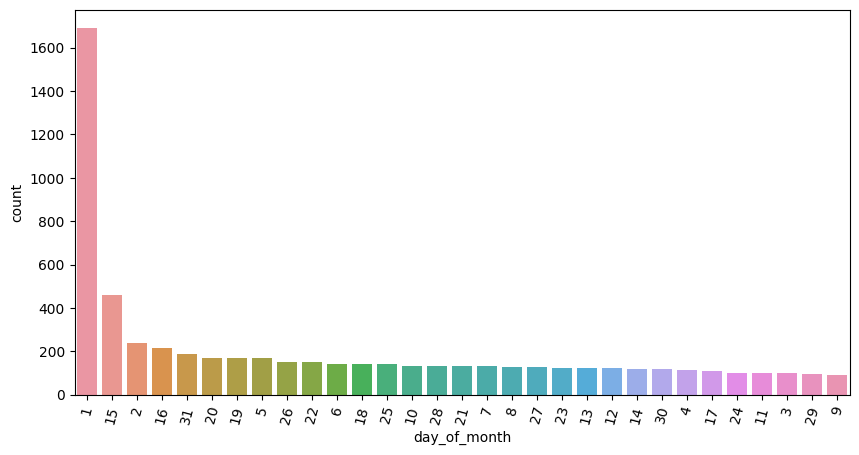

In [229]:
build_countplot(dom_df[dom_df['type'] == 'Movie'],'day_of_month',values = False,fig_size = (10,5),counts = 0)

Observations:
1. We can observe that significantly large number of movies are added on the 1st of the month. Hence 1st day of the month is the most popular day to add a new movie.
2. The second most popular day of the month to add a new movie is on the 15th day of the month.

Figure 41

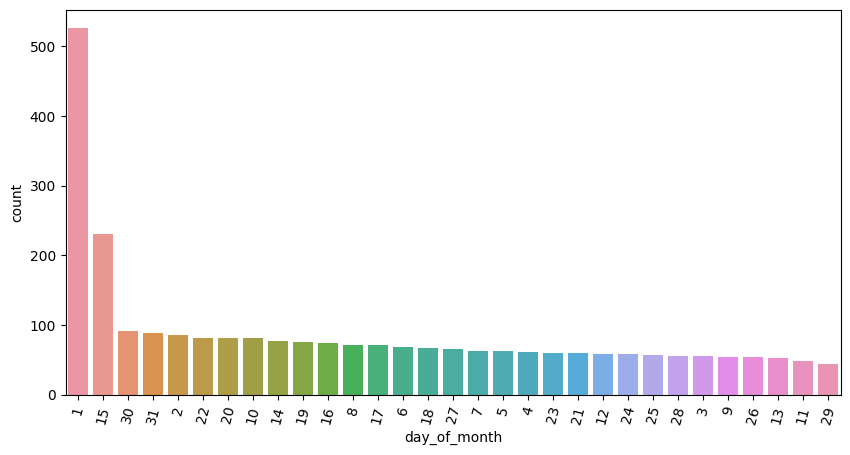

In [230]:
build_countplot(dom_df[dom_df['type'] == 'TV Show'],'day_of_month',values = False,fig_size = (10,5),counts = 0)

Observations:
1. Similar to the movies, the most popular day to add a new TV show is on the 1st day of the month and the second popular is the 15th day of the month.

### Difference in Release year and date added

In [31]:
df['date_added'] = df['date_added'].astype('datetime64[ns]')
non_dup_df = df.drop_duplicates(subset = ['show_id'])
non_dup_df.shape

(8807, 21)

In [32]:
non_dup_df['added_release_diff'] = non_dup_df['date_added'].dt.year - non_dup_df['release_year']

Figure 42

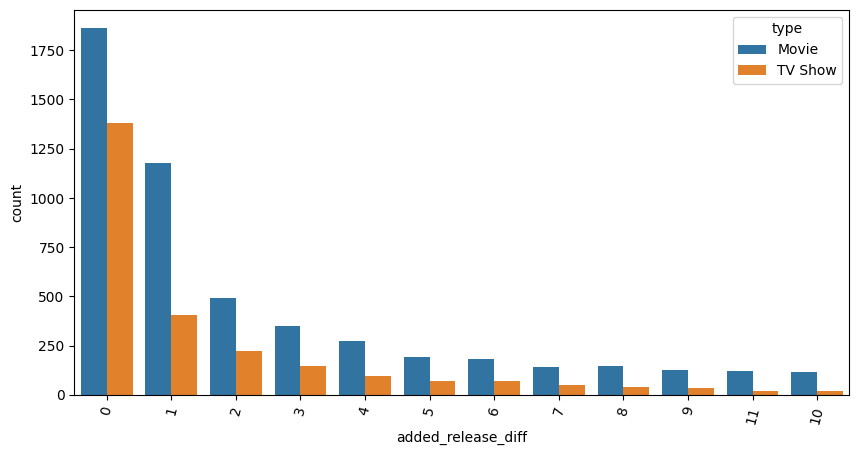

In [64]:
build_countplot(non_dup_df, 'added_release_diff', values = False, hue = 'type')

Observations:
1. We can see that most of the movies as well as tv shows in the dataset were added to the Netflix platform within 2 to 3 years from the release.
2. The best time to add the movies or tv shows is within 1 year from its release.

Figure 43

<Axes: xlabel='added_release_diff', ylabel='Density'>

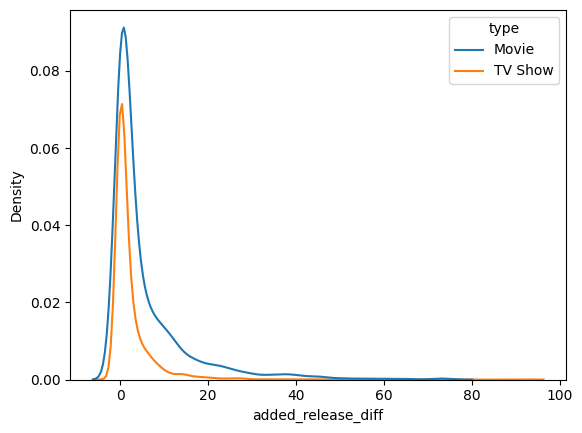

In [68]:
sns.kdeplot(data = non_dup_df, x = 'added_release_diff', hue = 'type')

Observations:
1. The distribution again proves that a big chunck of movies and tv shows are added to Netflix with in very few years of its release. 

### Week of Year analysis

Figure 44

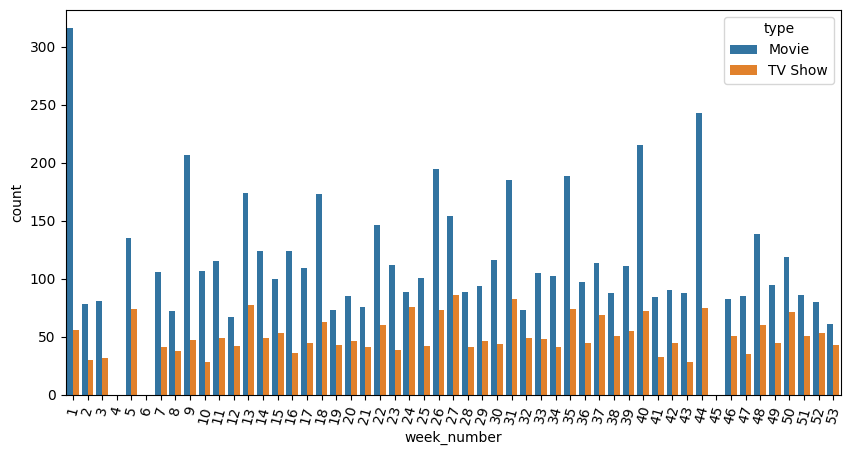

In [56]:
build_countplot(non_dup_df, 'week_number', order = list(range(1,54)), values = False, hue = 'type')

Observations:
1. The best weeks of the years to add a new movie are the 1st, 44th, 40th, 9th, 26th, 35th, 31st,13th, 18th and 27th weeks of the year.
2. The best weeks of the years to add a new TV show are the 27th, 31st, 13th, 24th, 44th, 35th, 5th, 26th, 40th, 50th weeks of the year. 
3. None of the Movies or TV shows were added in the 4th, 6th and the 45th week of the year.

Figure 45

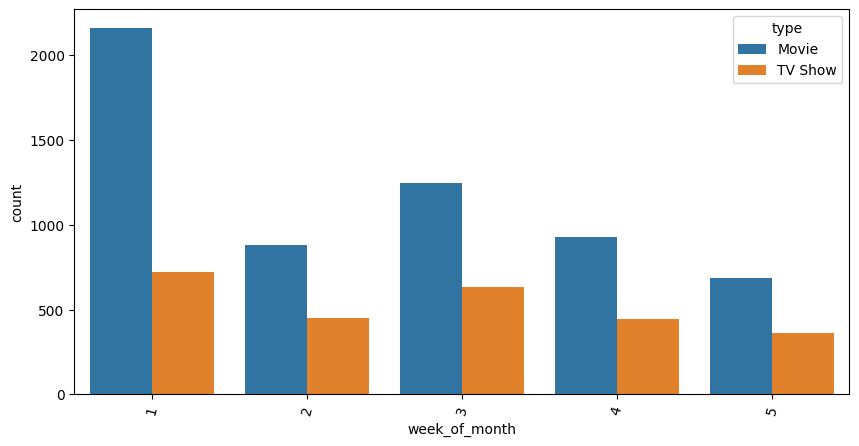

In [59]:
build_countplot(non_dup_df, 'week_of_month', order = list(range(1,6)), values = False, hue = 'type')

Obaservations:
1. With respect to month, the 1st and the 3rd weeks are the best time to add a new movie or a new tv show to Netflix.

### Most popular Actor-director pairs.

In [10]:
act_dir_df = df.drop_duplicates(subset = ['show_id','director','cast'])
act_dir_df.shape

(73484, 21)

Table 1

In [81]:
act_dir_df[act_dir_df['type']=='Movie'].groupby(['director','cast']).aggregate(number_of_movies = ('show_id', 'count')).reset_index().sort_values(by = 'number_of_movies', ascending = False)[:20].reset_index()

index           director                cast  number_of_movies
0   34546      Rajiv Chilaka       Julie Tejwani                20
1   34552      Rajiv Chilaka         Rajesh Kava                19
2   34553      Rajiv Chilaka        Rupa Bhimani                18
3   34545      Rajiv Chilaka      Jigna Bhardwaj                18
4   44882   Unknown Director       Unknown Actor                17
5   34561      Rajiv Chilaka        Vatsal Dubey                16
6   34549      Rajiv Chilaka              Mousam                13
7   34558      Rajiv Chilaka             Swapnil                13
8    1407         Alan Hicks        Quincy Jones                 8
9   44779   Unknown Director    Fortune Feimster                 8
10  42082        Suhas Kadav  Saurav Chakraborty                 8
11  13222        Frank Capra    Burgess Meredith                 7
12  44214  Toshiya Shinohara    Kappei Yamaguchi                 7
13  37834     S.S. Rajamouli    Tamannaah Bhatia                 7
14  44226  Toshiya Shinohara      Satsuki Yukino                 7
15  46892     Yılmaz Erdoğan      Yılmaz Erdoğan                 7
16  44212  Toshiya Shinohara     Houko Kuwashima                 7
17  26460      Mark Thornton        Michela Luci                 7
18  44219  Toshiya Shinohara     Kumiko Watanabe                 7
19  37831     S.S. Rajamouli           Sathyaraj                 7

Observations:

 The top most popular director-cast combo in Movies are:

1. Director: Rajiv Chilaka with cast: [Julie Tejwani, Rajesh Kava, Rupa Bhimani, Jigna Bharadwaj, Vatsal Dubey, Mousam and Swapnil.
2. Director: Alan Hicks with cast: Quincy Jones.
3. Director: Suhas Kadav with cast: Saurav Chakraborty.
4. Director: Frank Capra with cast: Burgess Meredith.
5. Director: Toshiya Shinohara with cast: Kappei Yamaguchi.
6. Director: S.S. Rajamouli with cast: [Tamannaah Bhatia,Sathyaraj].
7. Director: Toshiya Shinohara with cast: Satsuki Yukino.
8. Director: Yılmaz Erdoğan with cast: Yılmaz Erdoğan.
9. Director: Toshiya Shinohara with cast: Houko Kuwashima.
10. Director: Mark Thornton with cast: Michela Luci.
11. Director: Toshiya Shinohara with cast: Kumiko Watanabe.

Table 2

In [82]:
act_dir_df[act_dir_df['type']=='TV Show'].groupby(['director','cast']).aggregate(number_of_tvshows = ('show_id', 'count')).reset_index().sort_values(by = 'number_of_tvshows', ascending = False)[:20].reset_index()

index             director                cast  number_of_tvshows
0   16933     Unknown Director       Unknown Actor                 79
1    6165          Lynn Novick         David Chang                 55
2     617  Alastair Fothergill  David Attenborough                 43
3    1324    Barbara Schroeder         Mike Colter                 31
4    2209       Chris Robinson    Anthony Anderson                 23
5     658          Alex Gibney      Morgan Freeman                 23
6    4287     Hiroyuki Seshita    Takahiro Sakurai                 22
7    4289     Hiroyuki Seshita           Yuki Kaji                 18
8    4276     Hiroyuki Seshita         Daisuke Ono                 17
9    4277     Hiroyuki Seshita      Junichi Suwabe                 16
10   5565        Kazuya Murata           Ai Kayano                 16
11    346            Alan Poul          Adil Dehbi                 16
12   2752          Ellena Wood           Eric Idle                 15
13   2753          Ellena Wood         Greg Davies                 15
14   6413      Masahiko Murata     Yuichi Nakamura                 15
15   4435          Ishi Rudell       Ashleigh Ball                 15
16  14084      Sunao Katabuchi    Yoshimasa Hosoya                 15
17   8254         Noriyuki Abe        Jun Fukuyama                 14
18   1220          Ariel Boles        Hunter March                 14
19   8253         Noriyuki Abe      Hiroshi Kamiya                 13

Observations:

The most popular director-cast combo in TV shows are:

1. Director: Lynn Novick with cast: David Chang.
3. Director: Alastair Fothergill with cast: David Attenborough.
4. Director: Barbara Schroeder with cast: Mike Colter.
5. Director: Chris Robinson with cast: Anthony Anderson.
6. Director: Alex Gibney with cast: Morgan Freeman.
7. Director: Hiroyuki Seshita with cast: [Takahiro Sakurai, Yuki Kaji, Daisuke Ono and Junichi Suwabe].
11. Director: Kazuya Murata with cast: Ai Kayano.
12. Director: Alan Poul with cast: Adil Dehbi.
13. Director: Ellena Wood with cast: [Eric Idle, Greg Davies].
15. Director: Masahiko Murata with cast: Yuichi Nakamura.
16. Director: Ishi Rudell with cast: Ashleigh Ball.
17. Director: Sunao Katabuchi with cast: Yoshimasa Hosoya.
18. Director: Noriyuki Abe with cast: Jun Fukuyama.
19. Director: Ariel Boles with cast: Hunter March.
20. Director: Noriyuki Abe with cast: Hiroshi Kamiya.

### Analysing the top 10 popular Genres(listed_in)

In [13]:
popular_listings = ['International Movies', 'Dramas', 'Comedies', 'Documentaries', 'Action & Adventure', 'Independent Movies', 'Children & Family Movies', 'Romantic Movies', 'Thrillers', 'Music & Musicals','International TV Shows', 'TV Dramas', 'TV Comedies', 'Crime TV Shows', "Kids' TV", 'Docuseries', 'Romantic TV Shows','Reality TV', 'British TV Shows','Anime Series']

In [14]:
movie_pop_lists = df[(df['type']== 'Movie') & (df['listed_in'].isin(popular_listings))]
tvshow_pop_lists = df[(df['type']== 'TV Show') & (df['listed_in'].isin(popular_listings))]

Table 3

In [15]:
movie_pop_lists.groupby(['listed_in'])[['director','cast','country']].aggregate(pd.Series.mode).reset_index()

listed_in                  director  \
0        Action & Adventure           Martin Campbell   
1  Children & Family Movies              Raja Gosnell   
2                  Comedies              Raja Gosnell   
3             Documentaries           Martin Scorsese   
4                    Dramas           Martin Scorsese   
5        Independent Movies            Lars von Trier   
6      International Movies           Youssef Chahine   
7          Music & Musicals            Akiva Schaffer   
8           Romantic Movies       Cathy Garcia-Molina   
9                 Thrillers  Fernando González Molina   

                            cast        country  
0                 Luci Christian  United States  
1                 John Krasinski  United States  
2                    Tara Strong  United States  
3                  Unknown Actor  United States  
4   [Alfred Molina, Liam Neeson]  United States  
5                   James Franco  United States  
6                  Unknown Actor          India  
7                   Quincy Jones  United States  
8  [Akshay Kumar, Michelle Yeoh]  United States  
9                   Nicolas Cage  United States

Observations:

These are the most popular Directors and Casts for the top 10 most popular movie Genres(listed_in).

1. For the Action & Adventure genre, the most popular director is Martin Campbell and the most popular cast is/are Luci Christian

2. For the Children & Family Movies genre, the most popular director is Raja Gosnell and the most popular cast is/are John Krasinski

3. For the Comedies genre, the most popular director is Raja Gosnell and the most popular cast is/are Tara Strong

4. For the Documentaries genre, the most popular director is Martin Scorsese and the most popular cast is/are Unknown Actor

5. For the Dramas genre, the most popular director is Martin Scorsese and the most popular cast is/are ['Alfred Molina' 'Liam Neeson']

6. For the Independent Movies genre, the most popular director is Lars von Trier and the most popular cast is/are James Franco

7. For the International Movies genre, the most popular director is Youssef Chahine and the most popular cast is/are Unknown Actor

8. For the Music & Musicals genre, the most popular director is Akiva Schaffer and the most popular cast is/are Quincy Jones

9. For the Romantic Movies genre, the most popular director is Cathy Garcia-Molina and the most popular cast is/are ['Akshay Kumar' 'Michelle Yeoh']

10. For the Thrillers genre, the most popular director is Fernando González Molina and the most popular cast is/are Nicolas Cage.

11. The most popular country for all these listings/Genres is United States except the International Movies category for which the most popular country is India.

Table 4:

In [53]:
tvshow_pop_lists.groupby(['listed_in'])[['director','cast','country']].aggregate(pd.Series.mode).reset_index()

listed_in          director                        cast  \
0            Anime Series     Yasuhiro Irie            Takahiro Sakurai   
1        British TV Shows        Noam Murro          David Attenborough   
2          Crime TV Shows  Unknown Director                 Mike Colter   
3              Docuseries   Rob Seidenglanz               Unknown Actor   
4  International TV Shows  Unknown Director               Unknown Actor   
5                Kids' TV   Rob Seidenglanz                Vincent Tong   
6              Reality TV   Rob Seidenglanz               Unknown Actor   
7       Romantic TV Shows       Shin Won-ho               Unknown Actor   
8             TV Comedies   Rob Seidenglanz               Unknown Actor   
9               TV Dramas   Rob Seidenglanz  [Adil Dehbi, Joanna Kulig]   

          country  
0           Japan  
1  United Kingdom  
2   United States  
3   United States  
4           Japan  
5   United States  
6   United States  
7     South Korea  
8   United States  
9   United States

Observations:

These are the most popular Directors and Casts for the top 10 most popular TV Show Genres(listed_in).

1. For the Anime Series genre, the most popular director is Yasuhiro Irie and the most popular cast is/are Takahiro Sakurai.

2. For the British TV Shows genre, the most popular director is Noam Murro and the most popular cast is/are David Attenborough.

3. For the Crime TV Shows genre, the most popular director is Unknown Director and the most popular cast is/are Mike Colter.

4. For the Docuseries genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Unknown Actor.

5. For the International TV Shows genre, the most popular director is Unknown Director and the most popular cast is/are Unknown Actor.

6. For the Kids' TV genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Vincent Tong.

7. For the Reality TV genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Unknown Actor.

8. For the Romantic TV Shows genre, the most popular director is Shin Won-ho and the most popular cast is/are Unknown Actor.

9. For the TV Comedies genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Unknown Actor.

10. For the TV Dramas genre, the most popular director is Rob Seidenglanz and the most popular cast is/are ['Adil Dehbi' 'Joanna Kulig'].

11. The most popular country for 'Anime Series' and 'International TV Shows' is Japan, for 'British TV Shows' its United Kingdom, for 'Romantic TV Shows' its South Korea and for the rest of the Genres its the United States.

Table 5

In [16]:
movie_pop_lists.groupby(['listed_in']).aggregate(best_day_to_add = ('day',pd.Series.mode),
                                                best_month_to_add = ('month', pd.Series.mode),
                                                best_day_of_month = ('day_of_month', pd.Series.mode),
                                                best_running_time = ('duration_value', 'mean'))

best_day_to_add best_month_to_add  best_day_of_month  \
listed_in                                                                       
Action & Adventure                Friday         September                  1   
Children & Family Movies          Friday           October                  1   
Comedies                          Friday             April                  1   
Documentaries                     Friday         September                  1   
Dramas                            Friday              July                  1   
Independent Movies                Friday           January                  1   
International Movies              Friday              July                  1   
Music & Musicals                  Friday          November                  1   
Romantic Movies                   Friday              July                  1   
Thrillers                         Friday         September                  1   

                          best_running_time  
listed_in                                    
Action & Adventure               113.166339  
Children & Family Movies          85.431788  
Comedies                         102.024245  
Documentaries                     86.816369  
Dramas                           113.305081  
Independent Movies               102.766551  
International Movies             112.022169  
Music & Musicals                 112.045499  
Romantic Movies                  110.013256  
Thrillers                        108.326485

Observations:
1. The most popular day of the week on which the movies listed in most popular Genres(listed_in) are added is 'Friday'.
2. The most popular months to add movies listed in the most popular Genres are January for Independent Movies, April for Comedies, July for Dramas, International Movies and Romantic Movies, September for Action & Adventure, Documentaries and Thrillers, October for Children & Family Movies. 
3. All the most popular date on which these movies are added is the 1st day of the month.
4. The average run time of movies in the top 10 popular genres range between 85 to 113.30 minutes.

Table 6

In [19]:
tvshow_pop_lists.groupby(['listed_in']).aggregate(best_day_to_add = ('day',pd.Series.mode),
                                                best_month_to_add = ('month', pd.Series.mode),
                                                best_day_of_month = ('day_of_month', pd.Series.mode), 
                                                best_number_of_seasons = ('duration_value', 'median'))

best_day_to_add best_month_to_add  best_day_of_month  \
listed_in                                                                     
Anime Series                  Thursday             April                  1   
British TV Shows                Friday             March                  1   
Crime TV Shows                  Friday         September                  1   
Docuseries                      Friday          February                  1   
International TV Shows          Friday          December                  1   
Kids' TV                        Friday           January                  1   
Reality TV                      Friday            August                 31   
Romantic TV Shows               Friday          December                  1   
TV Comedies                     Friday          November                  1   
TV Dramas                       Friday              June                  1   

                        best_number_of_seasons  
listed_in                                       
Anime Series                               1.0  
British TV Shows                           2.0  
Crime TV Shows                             1.0  
Docuseries                                 1.0  
International TV Shows                     1.0  
Kids' TV                                   2.0  
Reality TV                                 2.0  
Romantic TV Shows                          1.0  
TV Comedies                                1.0  
TV Dramas                                  1.0

Observations:
1. The most popular day of the week on which the TV Shows listed in most popular Genres(listed_in) are added is 'Friday'. The most popular day for Anime Series is Thrusday.
2. The most popular months to add TV shows listed in the most popular Genres are January for Kids' TV, February for Docuseries, March for British TV Shows, April for Anime Series, June for TV Dramas, August for Reality TV, September for Crime TV Shows, November for TV Comedies and December for International TV Shows and Romantic TV Shows. 
3. All the most popular date on which these movies are added is the 1st day of the month and 31st for Reality TV shows.
4. The average number of seasons for tv shows in the top 10 popular genres is 1 or 2 seasons.

### Analysing top 10 countries

Top 10 most popular countries that add the most tv shows are 'United States', 'Sweden', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'India', 'France', 'Taiwan' and 'Australia.

Top 10 most popular countries that add the most movies are 'United States', 'India', 'United Kingdom', 'Canada', 'France',Germany, Spain, Japan, Nigeria and Egypt.

In [26]:
m_popular_countries = ['United States', 'Sweden', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'India', 'France', 'Taiwan' , 'Australia']
t_popular_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'France','Germany', 'Spain', 'Japan', 'Nigeria', 'Egypt']

In [27]:
movie_country_df = country_df[(country_df['type']=='Movie') & (df['country'].isin(m_popular_countries))]
tvshow_country_df = country_df[(country_df['type']=='TV Show') & (df['country'].isin(t_popular_countries))]
movie_country_df.shape, tvshow_country_df.shape

((99909, 21), (32307, 21))

Table 7

In [28]:
movie_country_df.groupby(['country'])[['director', 'cast', 'listed_in']].aggregate(pd.Series.mode).reset_index()

country           director                              cast  \
0       Australia          Clay Glen                     Unknown Actor   
1          Canada       Robert Vince  [John Paul Tremblay, Robb Wells]   
2          France     Thierry Donard                    Wille Lindberg   
3           India       David Dhawan                       Anupam Kher   
4           Japan  Toshiya Shinohara                         Yuki Kaji   
5     South Korea       Bong Joon Ho                  Kyeong-yeong Lee   
6          Sweden   Unknown Director                     Unknown Actor   
7          Taiwan            Ang Lee                          Roy Chiu   
8  United Kingdom        Sarah Smith                         Eric Idle   
9   United States    Martin Scorsese                      Quincy Jones   

              listed_in  
0                Dramas  
1              Comedies  
2  International Movies  
3  International Movies  
4    Action & Adventure  
5  International Movies  
6                Dramas  
7  International Movies  
8                Dramas  
9              Comedies

Observations:
1. In Australia, the most popular director is Clay Glen, the most popular cast is Unknown Actor and the most popular genre is Dramas.
2. In Canada, the most popular director is Robert Vince, the most popular cast is ['John Paul Tremblay' 'Robb Wells'] and the most popular genre is Comedies.
3. In France, the most popular director is Thierry Donard, the most popular cast is Wille Lindberg and the most popular genre is International Movies.
4. In India, the most popular director is David Dhawan, the most popular cast is Anupam Kher and the most popular genre is International Movies.
5. In Japan, the most popular director is Toshiya Shinohara, the most popular cast is Yuki Kaji and the most popular genre is Action & Adventure.
6. In South Korea, the most popular director is Bong Joon Ho, the most popular cast is Kyeong-yeong Lee and the most popular genre is International Movies.
7. In Sweden, the most popular director is Unknown Director, the most popular cast is Unknown Actor and the most popular genre is Dramas.
8. In Taiwan, the most popular director is Ang Lee, the most popular cast is Roy Chiu and the most popular genre is International Movies.
9. In United Kingdom, the most popular director is Sarah Smith, the most popular cast is Eric Idle and the most popular genre is Dramas.
10. In United States, the most popular director is Martin Scorsese, the most popular cast is Quincy Jones and the most popular genre is Comedies.

Table 8:

In [30]:
tvshow_country_df.groupby(['country'])[['director','cast','listed_in']].aggregate(pd.Series.mode).reset_index()

country               director                              cast  \
0          Canada         Stefan Brogren  [John Paul Tremblay, Robb Wells]   
1           Egypt       Unknown Director       [Ahmed Dawood, Sawsan Badr]   
2          France          Thomas Astruc                        Adil Dehbi   
3         Germany              Alan Poul  [Adil Dehbi, David Attenborough]   
4           India  Gautham Vasudev Menon                     Unknown Actor   
5           Japan          Yasuhiro Irie                  Takahiro Sakurai   
6         Nigeria           Kemi Adetiba                     Jude Chukwuka   
7           Spain              Mateo Gil                     Carlos Cuevas   
8  United Kingdom             Noam Murro                David Attenborough   
9   United States        Rob Seidenglanz                       David Chang   

                listed_in  
0                Kids' TV  
1  International TV Shows  
2  International TV Shows  
3  International TV Shows  
4  International TV Shows  
5  International TV Shows  
6  International TV Shows  
7  International TV Shows  
8        British TV Shows  
9               TV Dramas

Observations:
1. In Canada, the most popular director is Stefan Brogren, the most popular cast is ['John Paul Tremblay' 'Robb Wells'] and the most popular genre is Kids' TV.
2. In Egypt, the most popular director is Unknown Director, the most popular cast is ['Ahmed Dawood' 'Sawsan Badr'] and the most popular genre is International TV Shows.
3. In France, the most popular director is Thomas Astruc, the most popular cast is Adil Dehbi and the most popular genre is International TV Shows.
4. In Germany, the most popular director is Alan Poul, the most popular cast is ['Adil Dehbi' 'David Attenborough'] and the most popular genre is International TV Shows.
5. In India, the most popular director is Gautham Vasudev Menon, the most popular cast is Unknown Actor and the most popular genre is International TV Shows.
6. In Japan, the most popular director is Yasuhiro Irie, the most popular cast is Takahiro Sakurai and the most popular genre is International TV Shows.
7. In Nigeria, the most popular director is Kemi Adetiba, the most popular cast is Jude Chukwuka and the most popular genre is International TV Shows.
8. In Spain, the most popular director is Mateo Gil, the most popular cast is Carlos Cuevas and the most popular genre is International TV Shows.
9. In United Kingdom, the most popular director is Noam Murro, the most popular cast is David Attenborough and the most popular genre is British TV Shows.
10. In United States, the most popular director is Rob Seidenglanz, the most popular cast is David Chang and the most popular genre is TV Dramas.

Table 9

In [34]:
movie_country_df.groupby(['country']).aggregate(best_day_to_add = ('day',pd.Series.mode),
                                                best_month_to_add = ('month', pd.Series.mode),
                                                best_day_of_month = ('day_of_month', pd.Series.mode),
                                                avg_running_time = ('duration_value', 'mean'))

best_day_to_add     best_month_to_add  best_day_of_month  \
country                                                                   
Australia             Thursday                  July                  1   
Canada                  Friday  [December, November]                  1   
France                  Friday               October                  1   
India                 Thursday              December                  1   
Japan                Wednesday             September                  1   
South Korea             Friday              February                  1   
Sweden                  Friday             September                  1   
Taiwan                  Friday              February                  1   
United Kingdom          Friday               January                  1   
United States           Friday               January                  1   

                avg_running_time  
country                           
Australia             103.535737  
Canada                 94.905089  
France                102.675041  
India                 127.946630  
Japan                 105.747770  
South Korea           112.227481  
Sweden                 88.105490  
Taiwan                110.897912  
United Kingdom        106.833314  
United States         100.093619

Observations:
1. Wednesday is the best day of the week to add a new movie in Japan. Thursday is the best day of the week to add a movie in Australia and India and Friday is the best day of the week in Canada, France, South Korea, Sweden, Taiwan, United Kingdom and United States.
2. The best months to add a new movie is January for United Kingdom and United States, February for South Korea and Taiwan, July for Australia, September for Japan and Sweden, October for France ,November and December for Canada and December for India.
3. The best day of the month to add a new movie is the 1st day of the month.
4. Average runtime is between 88 mins to 127.94 mins.

Table 10

In [40]:
tvshow_country_df.groupby(['country']).aggregate(best_day_to_add = ('day',pd.Series.mode),
                                                best_month_to_add = ('month', pd.Series.mode),
                                                best_day_of_month = ('day_of_month', pd.Series.mode), 
                                                avg_number_of_seasons = ('duration_value', 'median'))

best_day_to_add best_month_to_add best_day_of_month  \
country                                                              
Canada                  Friday               May                 1   
Egypt                Wednesday             March                13   
France                  Friday           January                 1   
Germany                 Friday             March                 1   
India                   Friday            August                 1   
Japan                   Friday          December                 1   
Nigeria                 Friday            August          [15, 27]   
Spain                   Friday         September                 1   
United Kingdom          Friday             March                 1   
United States           Friday              July                 1   

                avg_number_of_seasons  
country                                
Canada                            2.0  
Egypt                             1.0  
France                            1.0  
Germany                           1.0  
India                             1.0  
Japan                             1.0  
Nigeria                           1.0  
Spain                             1.0  
United Kingdom                    2.0  
United States                     2.0

Observations:
1. Wednesday is the best day of the week to add a new tv show in Egypt. Friday is the best day of the week in Canada, France, Germany, India, Japan, Nigeria, Spain, United Kingdom and United States.
2. The best months to add a new tv show is January for France, March for United Kingdom, Germany and Egypt, May for Canada, July for United States, August for India and Nigeria, September for Spain and December for Japan.
3. The best days of the month to add a new tv shows are the 1st day of the month in Canada, France, Germany, India, Japan, Spain, United Kingdom and United States, 13th for Egypt and 15th and 27th for Nigeria.
4. Median number of seasons is 1 or 2 seasons.

### Number of movies added vs number of tv shows added over the years

In [78]:
addedyear_df = df.drop_duplicates(subset = ['show_id', 'year'])
addedyear_df.shape

(8816, 21)

In [84]:
m_addedyear_df = addedyear_df[addedyear_df['type']=='Movie'].groupby(['year']).aggregate(added_counts = ('show_id', 'count'))
m_addedyear_df['type'] = 'Movie'

In [85]:
t_addedyear_df = addedyear_df[addedyear_df['type']=='TV Show'].groupby(['year']).aggregate(added_counts = ('show_id', 'count'))
t_addedyear_df['type'] = 'TV Show'

In [88]:
addedyear_agg = pd.concat([m_addedyear_df,t_addedyear_df])

Figure 46

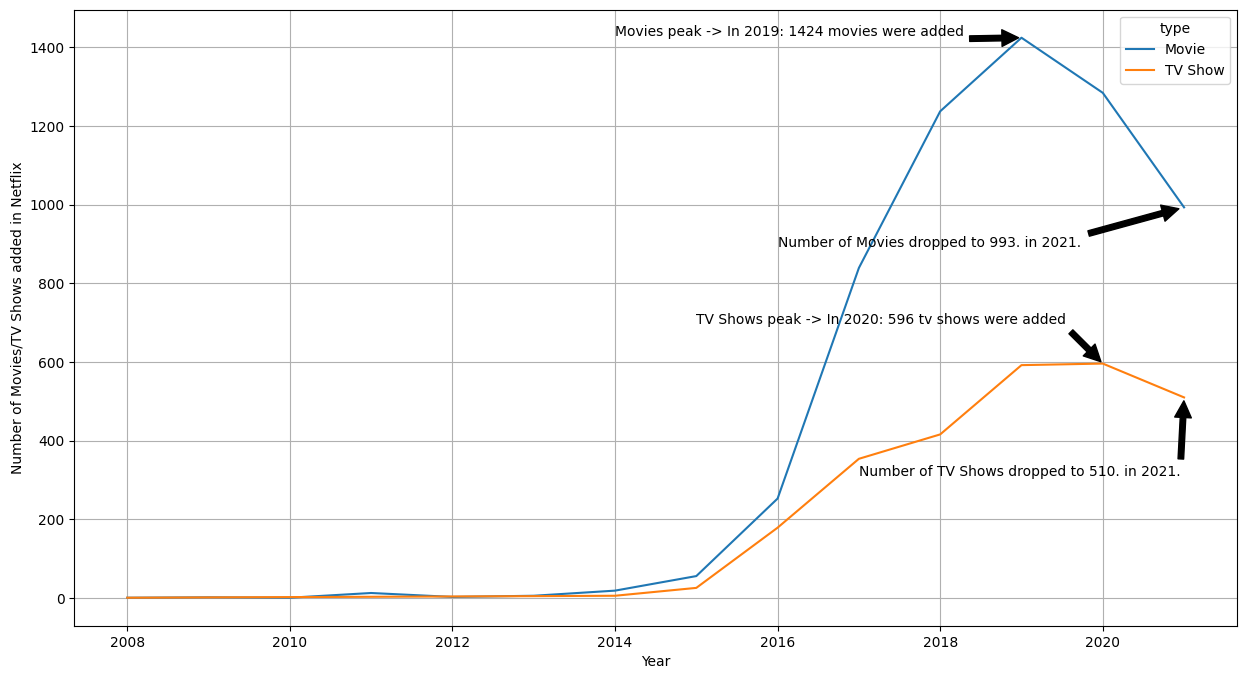

In [129]:
movie_max_index = addedyear_agg[addedyear_agg['added_counts']==addedyear_agg[addedyear_agg['type']=='Movie'].added_counts.max()].index[0]
movie_max_value = addedyear_agg[addedyear_agg['type']=='Movie'].added_counts.max()
tvshow_max_index = addedyear_agg[addedyear_agg['added_counts']==addedyear_agg[addedyear_agg['type']=='TV Show'].added_counts.max()].index[0]
tvshow_max_value = addedyear_agg[addedyear_agg['type']=='TV Show'].added_counts.max()
movie_last_value = addedyear_agg[addedyear_agg['type'] == 'Movie'].loc[2021].values[0]
tvshow_last_value = addedyear_agg[addedyear_agg['type'] == 'TV Show'].loc[2021].values[0]

plt.figure(figsize = (15,8))
sns.lineplot(data = addedyear_agg, x = 'year', y = 'added_counts', hue = 'type')
plt.annotate(f"Movies peak -> In {movie_max_index}: {str(movie_max_value)} movies were added", 
            xy = (movie_max_index, movie_max_value),
            xytext = (movie_max_index-5, movie_max_value+5),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f"TV Shows peak -> In {tvshow_max_index}: {str(tvshow_max_value)} tv shows were added", 
            xy = (tvshow_max_index, tvshow_max_value),
            xytext = (tvshow_max_index-5, tvshow_max_value+100),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f"Number of Movies dropped to {movie_last_value}. in 2021.", 
            xy = (2021, movie_last_value),
            xytext = (2016, movie_last_value-100),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f"Number of TV Shows dropped to {tvshow_last_value}. in 2021.", 
            xy = (2021, tvshow_last_value),
            xytext = (2017, tvshow_last_value-200),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid()
plt.xlabel("Year")
plt.ylabel("Number of Movies/TV Shows added in Netflix")
plt.show()

Observations:
1. We can see that the number of Movies and TV Shows added in the Netflix platform has increased after 2015.
2. The highest number of movies were added in the year 2019. About 1424 movies were added in this year.
3. After 2019, there has been a decline in the number of movies being added. It dropped to 993 in 2021.
4. The highest number of tv shows were added in the year 2020. About 596 movies were added in this year.
3. After 2020, there has been a decline in the number of tv shows being added. It dropped to 510 in 2021.


## Insights:

1.	There are multiple rows for the same movie/tv show produced in multiple languages. For this analysis I am considering each row with respect to different languages as different movies for this analysis.

2.	Figure 1: The numerical variables do not show much correlation. The most correlated variables are release_year and duration_value with a correlation of -0.3.

3.	Figure 2: From the Pair-plot, the Release_year variable and the year variable against the duration_value variable, the day_of_the_month against the release_year and year variable may show some relationship.

4.	Figure 3:  We can notice that most of the TV Shows that were added to Netflix are released in the recent years than movies. Also we can notice that there are some outlier TV Shows added to Netflix that were released even before all the Movies in the dataset  were released.

5.	Figure 4: We can observe that tv shows started releasing even before Movies.

6.	Figure 5: We can see that in the recent years, very small number of movies are exceeding the duration of 225 minutes compared to earlier years before 2005.

7.	Figure 8: 2017 onwards, the number of movies being added to Netflix have increased. Most number of movies were added in November 2019, July 2021 and December 2019.

8.	Figure 9: Most number of TV shows are added in July 2021 and June 2021.

9.	Figure 10: The plot shows that it is preferred to add most of the movies and TV shows are added in the 1st half of the month. The median day of the month on which the TV Shows are added is greater than the median day of the month on which movies are added.

10.	Figure 11: Consistently the number of movies added are always more than the number of tv shows added every day of the month. Most number of movies and tv shows are added before the 15th day of the month. Significantly a greater number of movies and considerably more number of tv shows are added in the 1st week of the month. The 2nd most day on which more number of movies and tv shows are added on the 15th of the month.

11.	Figure 12: About 6131 out of 8807 (i.e., 69.62%) show types is Movies. There are 2676 TV shows (i.e., 30.38%). This suggests that movies may be more successful. We can observe that Movies are more popular than TV Shows.

12.	Figure 14: We dont know the director for atleast 59 movies in the data. Top 10 most popular directors in the movie segment are Martin Scorsese, Rajiv Chilaka, Jan Suter, Raúl Campos, David Dhawan, Suhas Kadav, Jay Karas, Marcus Raboy, Cathy Champman and Youssef Chahine.

13.	Figure 15: We dont know the director for atleast 444 TV shows in the data. Top 10 most popular TV Show directors in the data are Rob Seidenglanz, Noam Murro, Yasuhiro Irie,Shin Won-ho, Stefan Brogren, Thomas Astruc, Hiroyuki Seshita, Chang Chin-jung, Mat King and Alan Poul.

14.	Figure 17: The top 10 most popular Movie casts are Quincy Jones,Burgess Meredith, Samuel West, Anupam Kher, Shah Rukh Khan, Akshay Kumar,Naseeruddin Shah,Om Puri, Julie Tejwani, Paresh Rawal and Amitabh Bachachan.

15.	Figure 18: The top 10 most popular tv actors are David Chang,David Attenborough,Mike Colter,Morgan Freeman, Takahiro Sakurai, Anthony Anderson, Adil Dehbi, Yuki Kaji, Ai Kayano and Daisuke Ono.

16.	More than 16.45 % of the movies/TV Shows are added to more than 1 country in the Netflix platform.

17.	Figure 20: Among the popular countries, United States and India are producing significantly more Movies than TV Shows that goes on Netflix. United Kingdom, Canada, France, Spain and Germany produce more movies that tv shows. Whereas, Sweden, Japan and South Korea produce more TV Shows than movies.

18.	Figure 21:  Top 10 most popular countries that add the most movies are United States, India, United Kingdom, Canada, France, Germany, Spain, Japan, Nigeria and Egypt.

19.	 Figure 22: Top 10 most popular countries that add the most tv shows are 'United States', 'Sweden', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'India', 'France', 'Taiwan' and 'Australia.

20.	The most popular duration for movies is between 90 to 103 minutes.

21.	The most popular TV shows are the shows with just 1 or 2 seasons.

22.	Figure 25: The top 5 popular movie ratings are TV-MA, TV-14, R, TV-PG and PG-13.

23.	Figure 26: The top 5 most popular tvshow ratings are TV-MA, TV-14, TV-PG, TV-Y7 and TV-Y.

24.	Figure 28: Shows the word cloud of the Genre variable (named ‘listed_in’).

25.	Figure 29 & 30: The top 10 listings/Genres for movies are International Movies, Dramas, Comedies, Documentaries, Action & Adventure, Independent Movies, Children & Family Movies, Romantic Movies, Thrillers and Music & Musicals. The International Movies, Dramas, Comedies and Action & Adventure all have average durations between 105 and 115 minutes. Documentaries on average are 80 mins long. Classic movies have the highest average duration of 120 mins and the least duration is for movies listed under 'Movies' with duration close to 50 minutes. 

26.	Figure 31 & 32: The top 10 listings for TV Shows are International TV Shows, TV Dramas, TV Comedies, Crime TV Shows, Kids' TV, Docuseries, Romantic TV Shows, Reality TV, British TV Shows and Anime.  The International TV Shows, TV Dramas, TV Comedies, Crime TV Shows and Kids' TV have 1 to 3 seasons on average. TV shows listed under "Classic & Cult TV' have the highest average number of seasons ranging from 4 to 7 seasons.

27.	Figure 34: Top 5 most popular months in which the most number of movies were added are July, April, December, January and October. 

28.	Figure 36: Top 5 months in which most number of tv shows were added are December, July, September, August and June. unlike the movies, for TV shows, the peaks of number of tv shows added is in the latter half of the year.

29.	Figure 38: Most popular day of the week to add new movies is Friday and Thursday. Least popular day of the week to add new movie is Saturday and Sunday.

30.	Figure 39: By a significantly large margin, the most popular day of the week to add a new TV Show is Friday and the least popular day to add a new TV Show is Saturday.

31.	Figure 40 & 41: Significantly large number of Movies and TV Shows are added on the 1st of the month. The second most popular day of the month to add a new movie or a tv show is on the 15th day of the month.

32.	Figure 42: We can see that most of the movies as well as tv shows in the dataset were added to the Netflix platform within 2 to 3 years from the release. The best time to add the movies or tv shows is within 1 year from its release.

33.	Figure 44: The most popular weeks of the years to add a new movie are the 1st, 44th, 40th, 9th, 26th, 35th, 31st,13th, 18th and 27th weeks of the year. The most popular weeks of the years to add a new TV show are the 27th, 31st, 13th, 24th, 44th, 35th, 5th, 26th, 40th, 50th weeks of the year. None of the Movies or TV shows were added in the 4th, 6th and the 45th week of the year.

34.	Figure 45: The 1st and the 3rd weeks are the most popular weeks when movie or tv show is added.

35.	Table 1: The top most popular director-cast combo in Movies are:

            •	Director: Rajiv Chilaka with cast: [Julie Tejwani, Rajesh Kava, Rupa Bhimani, Jigna Bharadwaj, Vatsal Dubey, Mousam and Swapnil.

            •	Director: Alan Hicks with cast: Quincy Jones.

            •	Director: Suhas Kadav with cast: Saurav Chakraborty.

            •	Director: Frank Capra with cast: Burgess Meredith.

            •	Director: Toshiya Shinohara with cast: Kappei Yamaguchi.

            •	Director: S.S. Rajamouli with cast: [Tamannaah Bhatia,Sathyaraj].

            •	Director: Toshiya Shinohara with cast: Satsuki Yukino.

            •	Director: Yılmaz Erdoğan with cast: Yılmaz Erdoğan.

            •	Director: Toshiya Shinohara with cast: Houko Kuwashima.

            •	Director: Mark Thornton with cast: Michela Luci.

            •	Director: Toshiya Shinohara with cast: Kumiko Watanabe.

36.	The most popular director-cast combo in TV shows are:

            •	Director: Lynn Novick with cast: David Chang.

            •	Director: Alastair Fothergill with cast: David Attenborough.

            •	Director: Barbara Schroeder with cast: Mike Colter.

            •	Director: Chris Robinson with cast: Anthony Anderson.

            •	Director: Alex Gibney with cast: Morgan Freeman.

            •	Director: Hiroyuki Seshita with cast: [Takahiro Sakurai, Yuki Kaji, Daisuke Ono and Junichi Suwabe].

            •	Director: Kazuya Murata with cast: Ai Kayano.

            •	Director: Alan Poul with cast: Adil Dehbi.

            •	Director: Ellena Wood with cast: [Eric Idle, Greg Davies].

            •	Director: Masahiko Murata with cast: Yuichi Nakamura.

            •	Director: Ishi Rudell with cast: Ashleigh Ball.

            •	Director: Sunao Katabuchi with cast: Yoshimasa Hosoya.

            •	Director: Noriyuki Abe with cast: Jun Fukuyama.

            •	Director: Ariel Boles with cast: Hunter March.

            •	Director: Noriyuki Abe with cast: Hiroshi Kamiya.

37.	Table 3: These are the most popular Directors and Casts for the top 10 most popular movie Genres(listed_in).

            •	For the Action & Adventure genre, the most popular director is Martin Campbell and the most popular cast is/are Luci Christian

            •	For the Children & Family Movies genre, the most popular director is Raja Gosnell and the most popular cast is/are John Krasinski

            •	For the Comedies genre, the most popular director is Raja Gosnell and the most popular cast is/are Tara Strong

            •	For the Documentaries genre, the most popular director is Martin Scorsese and the most popular cast is/are Unknown Actor

            •	For the Dramas genre, the most popular director is Martin Scorsese and the most popular cast is/are ['Alfred Molina' 'Liam Neeson']

            •	For the Independent Movies genre, the most popular director is Lars von Trier and the most popular cast is/are James Franco

            •	For the International Movies genre, the most popular director is Youssef Chahine and the most popular cast is/are Unknown Actor

            •	For the Music & Musicals genre, the most popular director is Akiva Schaffer and the most popular cast is/are Quincy Jones

            •	For the Romantic Movies genre, the most popular director is Cathy Garcia-Molina and the most popular cast is/are ['Akshay Kumar' 'Michelle Yeoh']

            •	For the Thrillers genre, the most popular director is Fernando González Molina and the most popular cast is/are Nicolas Cage.

            •	The most popular country for all these listings/Genres is United States except the International Movies category for which the most popular country is India.

        38.	Table 4: These are the most popular Directors and Casts for the top 10 most popular TV Show Genres(listed_in).

            •	For the Anime Series genre, the most popular director is Yasuhiro Irie and the most popular cast is/are Takahiro Sakurai.

            •	For the British TV Shows genre, the most popular director is Noam Murro and the most popular cast is/are David Attenborough.

            •	For the Crime TV Shows genre, the most popular director is Unknown Director and the most popular cast is/are Mike Colter.

            •	For the Docuseries genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Unknown Actor.

            •	For the International TV Shows genre, the most popular director is Unknown Director and the most popular cast is/are Unknown Actor.

            •	For the Kids' TV genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Vincent Tong.

            •	For the Reality TV genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Unknown Actor.

            •	For the Romantic TV Shows genre, the most popular director is Shin Won-ho and the most popular cast is/are Unknown Actor.

            •	For the TV Comedies genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Unknown Actor.

            •	For the TV Dramas genre, the most popular director is Rob Seidenglanz and the most popular cast is/are ['Adil Dehbi' 'Joanna Kulig'].

            •	The most popular country for 'Anime Series' and 'International TV Shows' is Japan, for 'British TV Shows' its United Kingdom, for 'Romantic TV Shows' its South Korea and for the rest of the Genres its the United States.

39.	Table 5: The most popular day of the week on which the movies listed in most popular Genres(listed_in) are added is 'Friday'. The most popular months to add movies listed in the most popular Genres are January for Independent Movies, April for Comedies, July for Dramas, International Movies and Romantic Movies, September for Action & Adventure, Documentaries and Thrillers, October for Children & Family Movies. All the most popular date on which these movies are added is the 1st day of the month. The average run time of movies in the top 10 popular genres range between 85 to 113.30 minutes.

40.	Table 6: The most popular day of the week on which the TV Shows listed in most popular Genres(listed_in) are added is 'Friday'. The most popular day for Anime Series is Thrusday. The most popular months to add TV shows listed in the most popular Genres are January for Kids' TV, February for Docuseries, March for British TV Shows, April for Anime Series, June for TV Dramas, August for Reality TV, September for Crime TV Shows, November for TV Comedies and December for International TV Shows and Romantic TV Shows.

41.	Table 6: All the most popular date on which these movies are added is the 1st day of the month and 31st for Reality TV shows. The average number of seasons for tv shows in the top 10 popular genres is 1 or 2 seasons.

42.	Table 7: Most popular Director, Cast and Genre in the most popular countries for movies:

            •	In Australia, the most popular director is Clay Glen, the most popular cast is Unknown Actor and the most popular genre is Dramas. 

            •	In Canada, the most popular director is Robert Vince, the most popular cast is ['John Paul Tremblay' 'Robb Wells'] and the most popular genre is Comedies. 

            •	In France, the most popular director is Thierry Donard, the most popular cast is Wille Lindberg and the most popular genre is International Movies. 

            •	In India, the most popular director is David Dhawan, the most popular cast is Anupam Kher and the most popular genre is International Movies.

            •	In Japan, the most popular director is Toshiya Shinohara, the most popular cast is Yuki Kaji and the most popular genre is Action & Adventure.

            •	In South Korea, the most popular director is Bong Joon Ho, the most popular cast is Kyeong-yeong Lee and the most popular genre is International Movies.

            •	In Sweden, the most popular director is Unknown Director, the most popular cast is Unknown Actor and the most popular genre is Dramas.

            •	In Taiwan, the most popular director is Ang Lee, the most popular cast is Roy Chiu and the most popular genre is International Movies.

            •	In United Kingdom, the most popular director is Sarah Smith, the most popular cast is Eric Idle and the most popular genre is Dramas.

            •	In United States, the most popular director is Martin Scorsese, the most popular cast is Quincy Jones and the most popular genre is Comedies

43.	Table 9: Most popular Day, month, day of the moth and average run time of the movies:

            •	Wednesday is the most popular day of the week for movies in Japan. Thursday is the most popular day of the week for movie in Australia and India and Friday is the most populra day of the week in Canada, France, South Korea, Sweden, Taiwan, United Kingdom and United States.

            •	The most popular months for movie is January for United Kingdom and United States, February for South Korea and Taiwan, July for Australia, September for Japan and Sweden, October for France ,November and December for Canada and December for India.

            •	The most popular day of the month to add movie is the 1st day of the month.

            •	Average runtime is between 88 mins to 127.94 mins.

        44.	Table 8: Most popular Director, Cast and Genre in the most popular countries for tv shows:

            •	In Canada, the most popular director is Stefan Brogren, the most popular cast is ['John Paul Tremblay' 'Robb Wells'] and the 
            most popular genre is Kids' TV.

            •	In Egypt, the most popular director is Unknown Director, the most popular cast is ['Ahmed Dawood' 'Sawsan Badr'] and the most popular genre is International TV Shows.

            •	In France, the most popular director is Thomas Astruc, the most popular cast is Adil Dehbi and the most popular genre is International TV Shows.

            •	In Germany, the most popular director is Alan Poul, the most popular cast is ['Adil Dehbi' 'David Attenborough'] and the most popular genre is International TV Shows.

            •	In India, the most popular director is Gautham Vasudev Menon, the most popular cast is Unknown Actor and the most popular genre is International TV Shows.

            •	In Japan, the most popular director is Yasuhiro Irie, the most popular cast is Takahiro Sakurai and the most popular genre is International TV Shows.

            •	In Nigeria, the most popular director is Kemi Adetiba, the most popular cast is Jude Chukwuka and the most popular genre is International TV Shows.

            •	In Spain, the most popular director is Mateo Gil, the most popular cast is Carlos Cuevas and the most popular genre is International TV Shows.

            •	In United Kingdom, the most popular director is Noam Murro, the most popular cast is David Attenborough and the most popular genre is British TV Shows.

            •	In United States, the most popular director is Rob Seidenglanz, the most popular cast is David Chang and the most popular genre is TV Dramas

45.	Table 10: Most popular Day, month, day of the moth and average run time of the tv shows:

            •	Wednesday is the most popular day of the week for tv show in Egypt. Friday is the most popular day of the week in Canada, France, Germany, India, Japan, Nigeria, Spain, United Kingdom and United States.

            •	The most popular months for tv show is January for France, March for United Kingdom, Germany and Egypt, May for Canada, July for United States, August for India and Nigeria, September for Spain and December for Japan.

            •	The most popular days of the month for tv shows are the 1st day of the month in Canada, France, Germany, India, Japan, Spain, United Kingdom and United States, 13th for Egypt and 15th and 27th for Nigeria.

            •	Median number of seasons is 1 or 2 seasons.

46.	Figure 46: Number of movies vs tv shows added per year:

            •	We can see that the number of Movies and TV Shows added in the Netflix platform has increased after 2015.

            •	The highest number of movies were added in the year 2019. About 1424 movies were added in this year.

            •	After 2019, there has been a decline in the number of movies being added. It dropped to 993 in 2021.

            •	The highest number of tv shows were added in the year 2020. About 596 movies were added in this year.

            •	After 2020, there has been a decline in the number of tv shows being added. It dropped to 510 in 2021.


## Recommendations 

#### Recommendations for Movies:

1. Netflix can invest in producing the following Genres in the Movies - International Movies, Dramas, Comedies, Documentaries, Action & Adventure, Independent Movies, Children & Family Movies, Romantic Movies, Thrillers and Music & Musicals. 
2. The movies seem to do well when directed by the following directors - Martin Scorsese, Rajiv Chilaka, Jan Suter, Raúl Campos, David Dhawan, Suhas Kadav, Jay Karas, Marcus Raboy, Cathy Champman and Youssef Chahine.
3. The movies tend to do well when the following casts are in them - Quincy Jones,Burgess Meredith, Samuel West, Anupam Kher, Shah Rukh Khan, Akshay Kumar,Naseeruddin Shah,Om Puri, Julie Tejwani, Paresh Rawal and Amitabh Bachachan.
3. We can add new movies in to the platform in the following countries - 'United States', 'India', 'United Kingdom', 'Canada', 'France',Germany, Spain, Japan, Nigeria and Egypt.
4. The following actor director combo does really well in the Movies. Netflix can look for these combinations when looking to produce a movie on its platform:
        
        •	Director: Rajiv Chilaka with cast: [Julie Tejwani, Rajesh Kava, Rupa Bhimani, Jigna Bharadwaj, Vatsal Dubey, Mousam and Swapnil.
        •	Director: Alan Hicks with cast: Quincy Jones.
        •	Director: Suhas Kadav with cast: Saurav Chakraborty.
        •	Director: Frank Capra with cast: Burgess Meredith.
        •	Director: Toshiya Shinohara with cast: Kappei Yamaguchi.
        •	Director: S.S. Rajamouli with cast: [Tamannaah Bhatia,Sathyaraj].
        •	Director: Toshiya Shinohara with cast: Satsuki Yukino.
        •	Director: Yılmaz Erdoğan with cast: Yılmaz Erdoğan.
        •	Director: Toshiya Shinohara with cast: Houko Kuwashima.
        •	Director: Mark Thornton with cast: Michela Luci.
        •	Director: Toshiya Shinohara with cast: Kumiko Watanabe.
5. The best Genres for movies are International Movies, Dramas, Comedies, Documentaries, Action & Adventure, Independent Movies, Children & Family Movies, Romantic Movies, Thrillers and Music & Musicals. The best director and casts to look for in these genre are as follows:
        
        •	For the Action & Adventure genre, the most popular director is Martin Campbell and the most popular cast is/are Luci Christian
        •	For the Children & Family Movies genre, the most popular director is Raja Gosnell and the most popular cast is/are John Krasinski
        •	For the Comedies genre, the most popular director is Raja Gosnell and the most popular cast is/are Tara Strong
        •	For the Documentaries genre, the most popular director is Martin Scorsese and the most popular cast is/are Unknown Actor
        •	For the Dramas genre, the most popular director is Martin Scorsese and the most popular cast is/are ['Alfred Molina' 'Liam Neeson']
        •	For the Independent Movies genre, the most popular director is Lars von Trier and the most popular cast is/are James Franco
        •	For the International Movies genre, the most popular director is Youssef Chahine and the most popular cast is/are Unknown Actor
        •	For the Music & Musicals genre, the most popular director is Akiva Schaffer and the most popular cast is/are Quincy Jones
        •	For the Romantic Movies genre, the most popular director is Cathy Garcia-Molina and the most popular cast is/are ['Akshay Kumar' 'Michelle Yeoh']
        •	For the Thrillers genre, the most popular director is Fernando González Molina and the most popular cast is/are Nicolas Cage.
        •	The most popular country for all these listings/Genres is United States except the International Movies category for which the most popular country is India.
6. The best day of the week to add a new movie is Friday. 
7. The best day to add a movie in the month is the 1st day or the 15th day of the month. 
8. The best months to add a new movie are January, April, July, October and December.
9. The best runtime of a movie can be within the range 85 to 110 minutes.


#### Recommendations for TV Shows:

1. Netflix can invest in producing the following Genres in the TV Shows - International TV Shows, TV Dramas, TV Comedies, Crime TV Shows, Kids' TV, Docuseries, Romantic TV Shows, Reality TV, British TV Shows and Anime.

2. The tv shows seem to do well when directed by the following directors - Rob Seidenglanz, Noam Murro, Yasuhiro Irie,Shin Won-ho, Stefan Brogren, Thomas Astruc, Hiroyuki Seshita, Chang Chin-jung, Mat King and Alan Poul.

3. The tv shows tend to do well when the following casts are in them - David Chang,David Attenborough,Mike Colter,Morgan Freeman, Takahiro Sakurai, Anthony Anderson, Adil Dehbi, Yuki Kaji, Ai Kayano and Daisuke Ono.

4. We can add new tv show in to the platform in the following countries - 'United States', 'Sweden', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'India', 'France', 'Taiwan' and 'Australia.

5. The following actor director combo does really well in tv shows. Netflix can look for these combinations when looking to produce a tv show on its platform:

        •	Director: Lynn Novick with cast: David Chang.
        •	Director: Alastair Fothergill with cast: David Attenborough.
        •	Director: Barbara Schroeder with cast: Mike Colter.
        •	Director: Chris Robinson with cast: Anthony Anderson.
        •	Director: Alex Gibney with cast: Morgan Freeman.
        •	Director: Hiroyuki Seshita with cast: [Takahiro Sakurai, Yuki Kaji, Daisuke Ono and Junichi Suwabe].
        •	Director: Kazuya Murata with cast: Ai Kayano.
        •	Director: Alan Poul with cast: Adil Dehbi.
        •	Director: Ellena Wood with cast: [Eric Idle, Greg Davies].
        •	Director: Masahiko Murata with cast: Yuichi Nakamura.
        •	Director: Ishi Rudell with cast: Ashleigh Ball.
        •	Director: Sunao Katabuchi with cast: Yoshimasa Hosoya.
        •	Director: Noriyuki Abe with cast: Jun Fukuyama.
        •	Director: Ariel Boles with cast: Hunter March.
        •	Director: Noriyuki Abe with cast: Hiroshi Kamiya.

6. The best Genres for tv shows are International TV Shows, TV Dramas, TV Comedies, Crime TV Shows, Kids' TV, Docuseries, Romantic TV Shows, Reality TV, British TV Shows and Anime. The best director and casts to look for in these genre are as follows:
       
        • For the Anime Series genre, the most popular director is Yasuhiro Irie and the most popular cast is/are Takahiro Sakurai.
        •	For the British TV Shows genre, the most popular director is Noam Murro and the most popular cast is/are David Attenborough.
        •	For the Crime TV Shows genre, the most popular director is Unknown Director and the most popular cast is/are Mike Colter.
        •	For the Docuseries genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Unknown Actor.
        •	For the International TV Shows genre, the most popular director is Unknown Director and the most popular cast is/are Unknown Actor.
        •	For the Kids' TV genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Vincent Tong.
        •	For the Reality TV genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Unknown Actor.
        •	For the Romantic TV Shows genre, the most popular director is Shin Won-ho and the most popular cast is/are Unknown Actor.
        •	For the TV Comedies genre, the most popular director is Rob Seidenglanz and the most popular cast is/are Unknown Actor.
        •	For the TV Dramas genre, the most popular director is Rob Seidenglanz and the most popular cast is/are ['Adil Dehbi' 'Joanna Kulig'].
        •	The most popular country for 'Anime Series' and 'International TV Shows' is Japan, for 'British TV Shows' its United Kingdom, for 'Romantic TV Shows' its South Korea and for the rest of the Genres its the United States.


7. The best day of the week to add a new tv show are Friday and Thursday.

8. The best day to add a tv show in the month is the 1st day or the 15th day of the month.

9. The best months to add a new tv show are December, July, September, August and June.

10. The tv shows seem to do well when there are about 1 to 2 or 3 seasons available for the show.

# *******************************************************************************